# <font color='red'>Project 2 Dataset Description: (Multi-Classification)</font>

<div class="alert alert-block alert-success">
    

##### Context:
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

##### Content:
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography. And the Project objective is to build a model that predicts what types of trees grow in an area based on the surrounding characteristics

##### Acknowledgement:
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.

##### Data_Dictionary

Elevation = Elevation in meters.         
Aspect = Aspect in degrees azimuth.                 
Slope = Slope in degrees.                                
Horizontal_Distance_To_Hydrology = Horizontal distance to nearest surface water features.                  
Vertical_Distance_To_Hydrology = Vertical distance to nearest surface water features.                 
Horizontal_Distance_To_Roadways = Horizontal distance to nearest roadway.                   
Hillshade_9am = Hill shade index at 9am, summer solstice. Value out of 255.                  
Hillshade_Noon = Hill shade index at noon, summer solstice. Value out of 255.                  
Hillshade_3pm = Hill shade index at 3pm, summer solstice. Value out of 255.                  
Horizontal_Distance_To_Fire_Point = sHorizontal distance to nearest wildfire ignition points.                 
Wilderness_Area1 = Rawah Wilderness Area                   
Wilderness_Area2 = Neota Wilderness Area                
Wilderness_Area3 = Comanche Peak Wilderness Area           
Wilderness_Area4 = Cache la Poudre Wilderness Area                    
Soil_Type1 to Soil_Type39         

##### Cover_Type - Forest Cover Type designation(Target Variable), with the following key:

Spruce/Fir                   
Lodgepole Pine                          
Ponderosa Pine               
Cottonwood/Willow              
Aspen                   
Douglas-fir                   
Krummholz     

##### Reference: https://www.kaggle.com/uciml/forest-cover-type-dataset


<div class="alert alert-block alert-info">
<b><font size="4"> Importing the Necessary Libraries</font></b>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# The scikit-learn module is downgraded to 0.19.2 version as teh latest version is not supporting the voting classifier
#pip install scikit-learn==0.19.2
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,recall_score,roc_auc_score
from sklearn.metrics import roc_curve,precision_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



<div class="alert alert-block alert-info">
<b><font size="4">Reading the Dataset</font></b>
</div>

In [2]:
df= pd.read_csv(r'C:\Univ\3rd Semester\Machine Learning\Project 1\covertype.csv')

In [3]:
display(df.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,soil
0,2830.0,26.0,7.0,30.0,NaN,2914.0,217.0,225.0,144,4094.0,1.0,0,0.0,0,Lodgepole Pine,Soil_Type23
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,164,1290.0,0.0,0,1.0,0,Douglas-fir,Soil_Type20
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,110,2911.0,1.0,0,0.0,0,Krummholz,Soil_Type29
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,189,1952.0,0.0,0,1.0,0,Krummholz,Soil_Type38
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,209,722.0,0.0,0,0.0,1,Douglas-fir,Soil_Type1



<div class="alert alert-block alert-info">
<b><font size="4">Exploration of the Dataset</font></b>
</div>

In [4]:
df.shape

(72418, 16)

From the above results we can see that we have totally 16 Features and 72418 rows of data points 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72418 entries, 0 to 72417
Data columns (total 16 columns):
Elevation                             68107 non-null float64
Aspect                                72347 non-null float64
Slope                                 67093 non-null float64
Horizontal_Distance_To_Hydrology      71528 non-null float64
Vertical_Distance_To_Hydrology        71574 non-null float64
Horizontal_Distance_To_Roadways       71848 non-null float64
Hillshade_9am                         72290 non-null float64
Hillshade_Noon                        69668 non-null float64
Hillshade_3pm                         72418 non-null int64
Horizontal_Distance_To_Fire_Points    71423 non-null float64
Wilderness_Area1                      67381 non-null float64
Wilderness_Area2                      72418 non-null int64
Wilderness_Area3                      71406 non-null float64
Wilderness_Area4                      72418 non-null int64
Cover_Type                            72289

From the above results we can see that we have three categorical features and ten Numerical features

In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,68107.000000,72347.000000,67093.000000,71528.000000,71574.000000,71848.000000,72290.000000,69668.000000,72418.000000,71423.000000,67381.000000,72418.000000,71406.000000,72418.000000
mean,2798.299162,159.994969,16.453013,241.501943,52.383617,1793.414069,210.104081,219.006072,138.344472,1569.711998,0.250293,0.036773,0.465185,0.247853
std,405.726869,112.750379,8.415237,209.715657,61.133222,1358.890366,31.350152,23.155369,44.883677,1115.452582,0.433185,0.188204,0.498790,0.431769
min,1859.000000,0.000000,0.000000,0.000000,-157.000000,0.000000,0.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2457.000000,63.000000,10.000000,85.000000,7.000000,778.000000,193.000000,207.000000,111.000000,767.000000,0.000000,0.000000,0.000000,0.000000
50%,2798.000000,130.000000,15.000000,192.000000,35.000000,1406.000000,217.000000,223.000000,141.000000,1315.000000,0.000000,0.000000,0.000000,0.000000
75%,3160.000000,273.000000,22.000000,339.000000,80.000000,2446.000000,233.000000,236.000000,170.000000,2081.000000,1.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,59.000000,1320.000000,590.000000,7092.000000,254.000000,254.000000,252.000000,7062.000000,1.000000,1.000000,1.000000,1.000000


From the above results we can see that statistical summary of Numerical features alone in the dataset, the point to be noted is that each feature's values are in different ranges and some of them having missing values where the min vlaue is '0' which is not quite convincing (indicates an invalid or missing value) and it will be taken care of in Data preprocessing

In [7]:
df.describe(include='O')

,Cover_Type,soil
count,72289,72418
unique,7,39
top,Ponderosa Pine,Soil_Type10
freq,13580,11517


The above results are the statistical summary results of Object(categorical) Features 


<div class="alert alert-block alert-info">


# Data Wrangling & Pre-Processing

1. Identify and handling missing values
2. Data Formatting (categorical to numerical, changing datatypes)
3. Categorical data transformation (One-Hot Encoding)
4. Duplicates Removal

### 1. The missing data can be handled by any of the following methods, will implement all based on the reqirement:
Drop Missing Values   

Fill Missing Values With Test Statistic(Imputing)      
 
Predict Missing Value With a Machine Learning Algorithm

In [8]:
df.isnull().sum()

Elevation                             4311
Aspect                                  71
Slope                                 5325
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        570
Hillshade_9am                          128
Hillshade_Noon                        2750
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points     995
Wilderness_Area1                      5037
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

From the above results we can see that we have many missing values for all the Features, among which we have more data points missing in Elevation,Slope and  Wilderness_Area1 Columns which is roughly around 7% of the whole dataset

We will impute the data for Slope Feature 

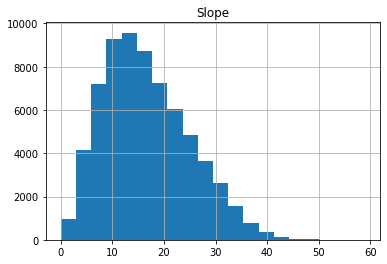

Mean of the Slope Feature is 16.453 and the Median is 15.000


In [9]:
df.hist(column='Slope',bins=20);
plt.show()
print('Mean of the Slope Feature is %.3f and the Median is %.3f'%(df['Slope'].mean(),df['Slope'].median()))

From the above histogram we can see that the slope feature is positively skewed (Mean>Median). A skewed histogram suggests adopting the median as the method for imputation, where as a normal distribution leans towards adopting the mean. Hence we will adopt to imputing mean as the replacing value for the missing datapoints

First we will make the missing values 0 to NaN values in the Slope column

In [10]:
df[df['Slope']==0]['Slope'].value_counts()

0.0    55
Name: Slope, dtype: int64

In [11]:
df['Slope'].isnull().sum()

5325

There are 55 - '0' values and 5325 - 'NaN' in Slope column, first we will change all zeroes in to NaN

In [3]:
df['Slope'].replace(0,np.NaN,inplace=True)

In [4]:
df[df['Slope']==0]['Slope'].value_counts()

Series([], Name: Slope, dtype: int64)

In [5]:
df['Slope'].isnull().sum()

5380

In [6]:
from sklearn.preprocessing import Imputer

In [7]:
median_imputer = Imputer(missing_values='NaN', strategy='median', axis=0)

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
df['Slope']= median_imputer.fit_transform(df[['Slope']])

In [9]:
df['Slope'].isnull().sum()

0

In [18]:
df.isnull().sum()

Elevation                             4311
Aspect                                  71
Slope                                    0
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        570
Hillshade_9am                          128
Hillshade_Noon                        2750
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points     995
Wilderness_Area1                      5037
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

From the above results we can see that all the missing values in the slope column is successfully imputed by its median and there aren't any missing values

In [10]:
# likewise will first change call the values of 0 into NaN for all numerical columns
df['Aspect'].replace(0,np.NaN,inplace=True)
df['Horizontal_Distance_To_Roadways'].replace(0,np.NaN,inplace=True)
df['Hillshade_9am'].replace(0,np.NaN,inplace=True)
df['Hillshade_3pm'].replace(0,np.NaN,inplace=True)
df['Horizontal_Distance_To_Fire_Points'].replace(0,np.NaN,inplace=True)

In [20]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,68107.000000,71814.000000,72418.000000,71528.000000,71574.000000,71813.000000,72287.00000,69668.000000,72052.000000,71411.000000,67381.000000,72418.000000,71406.000000,72418.000000
mean,2798.299162,161.182444,16.357563,241.501943,52.383617,1794.288137,210.11280,219.006072,139.047216,1569.975774,0.250293,0.036773,0.465185,0.247853
std,405.726869,112.319185,8.096361,209.715657,61.133222,1358.644423,31.32157,23.155369,43.898314,1115.360668,0.433185,0.188204,0.498790,0.431769
min,1859.000000,1.000000,1.000000,0.000000,-157.000000,30.000000,54.00000,63.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,2457.000000,64.000000,10.000000,85.000000,7.000000,778.000000,193.00000,207.000000,111.000000,767.000000,0.000000,0.000000,0.000000,0.000000
50%,2798.000000,131.000000,15.000000,192.000000,35.000000,1406.000000,217.00000,223.000000,141.000000,1315.000000,0.000000,0.000000,0.000000,0.000000
75%,3160.000000,274.000000,21.000000,339.000000,80.000000,2447.000000,233.00000,236.000000,170.000000,2081.000000,1.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,59.000000,1320.000000,590.000000,7092.000000,254.00000,254.000000,252.000000,7062.000000,1.000000,1.000000,1.000000,1.000000


Now we will impute the mostFrequent for Wilderness_Area1,Hillshade_Noon and Horizontal_Distance_To_Hydrology Feature

In [21]:
df.isnull().sum()

Elevation                             4311
Aspect                                 604
Slope                                    0
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        605
Hillshade_9am                          131
Hillshade_Noon                        2750
Hillshade_3pm                          366
Horizontal_Distance_To_Fire_Points    1007
Wilderness_Area1                      5037
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

In [22]:
df['Wilderness_Area1'].value_counts()

0.0    50516
1.0    16865
Name: Wilderness_Area1, dtype: int64

In [23]:
df['Wilderness_Area1'].isnull().sum()

5037

In [11]:
freq_imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
df['Wilderness_Area1']= freq_imputer.fit_transform(df[['Wilderness_Area1']])

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
df['Wilderness_Area1'].value_counts()

0.0    55553
1.0    16865
Name: Wilderness_Area1, dtype: int64

In [26]:
df['Wilderness_Area1'].isnull().sum()

0

In [27]:
df.isnull().sum()

Elevation                             4311
Aspect                                 604
Slope                                    0
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        605
Hillshade_9am                          131
Hillshade_Noon                        2750
Hillshade_3pm                          366
Horizontal_Distance_To_Fire_Points    1007
Wilderness_Area1                         0
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

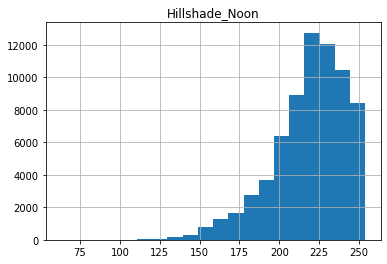

Mean of the Hillshade_Noon Feature is 219.006 and the Median is 223.000


In [28]:
df.hist(column='Hillshade_Noon',bins=20);
plt.show()
print('Mean of the Hillshade_Noon Feature is %.3f and the Median is %.3f'%(df['Hillshade_Noon'].mean(),df['Hillshade_Noon'].median()))

In [13]:
median_imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
df['Hillshade_Noon']= median_imputer.fit_transform(df[['Hillshade_Noon']])

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
df.isnull().sum()

Elevation                             4311
Aspect                                 604
Slope                                    0
Horizontal_Distance_To_Hydrology       890
Vertical_Distance_To_Hydrology         844
Horizontal_Distance_To_Roadways        605
Hillshade_9am                          131
Hillshade_Noon                           0
Hillshade_3pm                          366
Horizontal_Distance_To_Fire_Points    1007
Wilderness_Area1                         0
Wilderness_Area2                         0
Wilderness_Area3                      1012
Wilderness_Area4                         0
Cover_Type                             129
soil                                     0
dtype: int64

Now we will remove the missing values of the remaining features

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Cover_Type                            0
soil                                  0
dtype: int64

In [35]:
df[df.duplicated()].count()

Elevation                             2784
Aspect                                2784
Slope                                 2784
Horizontal_Distance_To_Hydrology      2784
Vertical_Distance_To_Hydrology        2784
Horizontal_Distance_To_Roadways       2784
Hillshade_9am                         2784
Hillshade_Noon                        2784
Hillshade_3pm                         2784
Horizontal_Distance_To_Fire_Points    2784
Wilderness_Area1                      2784
Wilderness_Area2                      2784
Wilderness_Area3                      2784
Wilderness_Area4                      2784
Cover_Type                            2784
soil                                  2784
dtype: int64

From above we can see that there are 2,784 rows are duplicate rows whcih needs to be removed

### 2. Dropping Duplicate rows

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df[df.duplicated()].count()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Cover_Type                            0
soil                                  0
dtype: int64

In [38]:
df.shape

(60261, 16)

As we can see all the missing values are dropped and after dropping out dataframe shape reduced to 60261,16

### 3.Categorical data transformation by using One-Hot Encoding

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60261 entries, 1 to 72417
Data columns (total 16 columns):
Elevation                             60261 non-null float64
Aspect                                60261 non-null float64
Slope                                 60261 non-null float64
Horizontal_Distance_To_Hydrology      60261 non-null float64
Vertical_Distance_To_Hydrology        60261 non-null float64
Horizontal_Distance_To_Roadways       60261 non-null float64
Hillshade_9am                         60261 non-null float64
Hillshade_Noon                        60261 non-null float64
Hillshade_3pm                         60261 non-null float64
Horizontal_Distance_To_Fire_Points    60261 non-null float64
Wilderness_Area1                      60261 non-null float64
Wilderness_Area2                      60261 non-null int64
Wilderness_Area3                      60261 non-null float64
Wilderness_Area4                      60261 non-null int64
Cover_Type                            602

Here the Dependent variable is the Forest Cover type ('Cover_Type') which is a type of cover will occupy the area based on all the independent features

In [40]:
df['Cover_Type'].unique()

array(['Douglas-fir', 'Krummholz', 'Cottonwood/Willow', 'Spruce/Fir',
       'Aspen', 'Ponderosa Pine', 'Lodgepole Pine'], dtype=object)

There are 7 different types of Forest covers(Multi classification)

In [41]:
df['soil'].unique()

array(['Soil_Type20', 'Soil_Type29', 'Soil_Type38', 'Soil_Type1',
       'Soil_Type10', 'Soil_Type3', 'Soil_Type13', 'Soil_Type22',
       'Soil_Type31', 'Soil_Type4', 'Soil_Type2', 'Soil_Type24',
       'Soil_Type16', 'Soil_Type23', 'Soil_Type17', 'Soil_Type30',
       'Soil_Type32', 'Soil_Type34', 'Soil_Type40', 'Soil_Type33',
       'Soil_Type39', 'Soil_Type35', 'Soil_Type12', 'Soil_Type19',
       'Soil_Type37', 'Soil_Type6', 'Soil_Type14', 'Soil_Type5',
       'Soil_Type11', 'Soil_Type9', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type36', 'Soil_Type26', 'Soil_Type25', 'Soil_Type18',
       'Soil_Type21', 'Soil_Type8', 'Soil_Type7'], dtype=object)

There are 39 diferent types of soil 

both of these features represents the categorical nature of its values (Nominal), which needs to be converted into Numerical as most of the Machine learning models understands only the numbers. But we will consider one-Hot encoding for Soil type only and not for Cover_type as its the target feature but we will just convert it to numerical

In [18]:
#One-Hot Encoding
df1= pd.get_dummies(df['soil'])

In [43]:
display(df1.head())

,Soil_Type1,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df= pd.concat([df,df1],axis=1)

In [20]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,164.0,1290.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,110.0,2911.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,189.0,1952.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,209.0,722.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,169.0,700.0,...,0,0,0,0,0,0,0,0,0,0


We will convert the Cover_type string categorical column into Numerical values by mapping

In [21]:
df['Cover_Type'].value_counts()

Ponderosa Pine       11347
Spruce/Fir           10453
Douglas-fir          10066
Krummholz             9446
Lodgepole Pine        8720
Aspen                 7833
Cottonwood/Willow     2396
Name: Cover_Type, dtype: int64

In [22]:
df['Cover_Type']=df['Cover_Type'].map({'Spruce/Fir':1,'Lodgepole Pine':2,'Ponderosa Pine':3,'Cottonwood/Willow':4, 'Aspen':5,'Douglas-fir':6,'Krummholz':7})

In [23]:
df['Cover_Type'].value_counts()

3    11347
1    10453
6    10066
7     9446
2     8720
5     7833
4     2396
Name: Cover_Type, dtype: int64

Now we have to remove the soil column which has been converted into dummy variables

In [24]:
df.drop('soil',axis=1,inplace=True)

In [25]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,164.0,1290.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,110.0,2911.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,189.0,1952.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,209.0,722.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,169.0,700.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60261 entries, 1 to 72417
Data columns (total 54 columns):
Elevation                             60261 non-null float64
Aspect                                60261 non-null float64
Slope                                 60261 non-null float64
Horizontal_Distance_To_Hydrology      60261 non-null float64
Vertical_Distance_To_Hydrology        60261 non-null float64
Horizontal_Distance_To_Roadways       60261 non-null float64
Hillshade_9am                         60261 non-null float64
Hillshade_Noon                        60261 non-null float64
Hillshade_3pm                         60261 non-null float64
Horizontal_Distance_To_Fire_Points    60261 non-null float64
Wilderness_Area1                      60261 non-null float64
Wilderness_Area2                      60261 non-null int64
Wilderness_Area3                      60261 non-null float64
Wilderness_Area4                      60261 non-null int64
Cover_Type                            602

As we can see above now all the features are convereted to numerical suitable for buildinng a Machine learning models


<div class="alert alert-block alert-info">
<b><font size="4">Checking the balancing of Dataset</font></b>
</div>


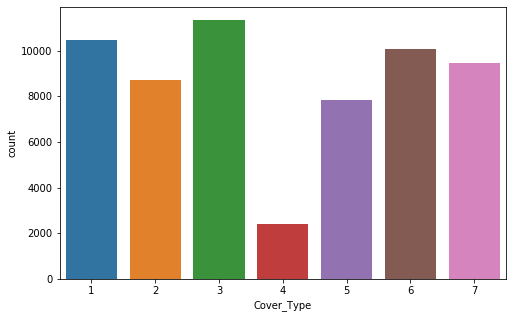

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(df['Cover_Type']);

From the above count plot we can see that the cover type of 4 is less when compared with the other cover types, which leads to conclusion that it is not a balanced dataset

In [53]:
df.to_csv('processingdonecovtype.csv')

In [2]:
df= pd.read_csv('processingdonecovtype.csv',index_col=0)

In [ ]:
df.head()


<div class="alert alert-block alert-info">
<b><font size="4">Exploratory  Data Analysis</font></b>
</div>


### Checking for multicollinearity and identifying the insignificant Features 

In [83]:
eda= df.copy()
xvar=eda.loc[:,'Elevation':'Wilderness_Area4']
yvar=eda['Cover_Type']
edadf=pd.concat([xvar,yvar],axis=1)

In [116]:
#identifying insignificant Features
def coefpval(x,y):
    x=x[x.corr().columns]
    from scipy import stats
    ls=[]
    for i in range(x.shape[1]):
        ls.append(stats.pearsonr(x.iloc[:,i], y)  )
    copv=pd.DataFrame(ls,index=x.columns,columns= ['Pearson-Coeff','P-Value'])
    copv['P-Ind'] = pd.cut(copv['P-Value'], bins =[0, 0.001, 0.05,0.1, 1.0], labels=['Strong','Moderate','Weak','Insignificant'], include_lowest=True )
    copv['C-Ind'] = pd.cut(copv['Pearson-Coeff'], bins =[-1.0,0, 1.0], labels=['Negative','Positive'], include_lowest=True )
    
    return copv

# Function of multi-Correlation
def multicorrelation(data, threshold=0.80):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = data.corr()
    
    print('  \n    Correlation with more than :',threshold)
    print('\n\nCorr Value',"\t""\t", 'Fearture1', "\t\t\t", 'Feature 2')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(corr_matrix.iloc[i, j], "\t", corr_matrix.columns[i], "\t" "\t\t", corr_matrix.columns[j])
                     
    print('\n\n The above mentioned correlations only are present in the given Dataset')

In [91]:
coefpval(edadf,yvar)

,Pearson-Coeff,P-Value,P-Ind,C-Ind
Elevation,0.005486,1.781083e-01,Insignificant,Positive
Aspect,0.007390,6.967663e-02,Weak,Positive
Slope,0.082111,1.188489e-90,Strong,Positive
Horizontal_Distance_To_Hydrology,0.004297,2.915222e-01,Insignificant,Positive
Vertical_Distance_To_Hydrology,0.081518,2.271071e-89,Strong,Positive
Horizontal_Distance_To_Roadways,-0.106410,2.982520e-151,Strong,Negative
Hillshade_9am,-0.021176,2.006148e-07,Strong,Negative
Hillshade_Noon,-0.103165,3.071473e-142,Strong,Negative
Hillshade_3pm,-0.048902,3.092508e-33,Strong,Negative
Horizontal_Distance_To_Fire_Points,-0.086493,2.069826e-100,Strong,Negative


From the above results we can see that Elevation, Horizontal_Distance_To_Hydrology, Wilderness_Area2 are the 3 insignificant Features with respect to the target variable

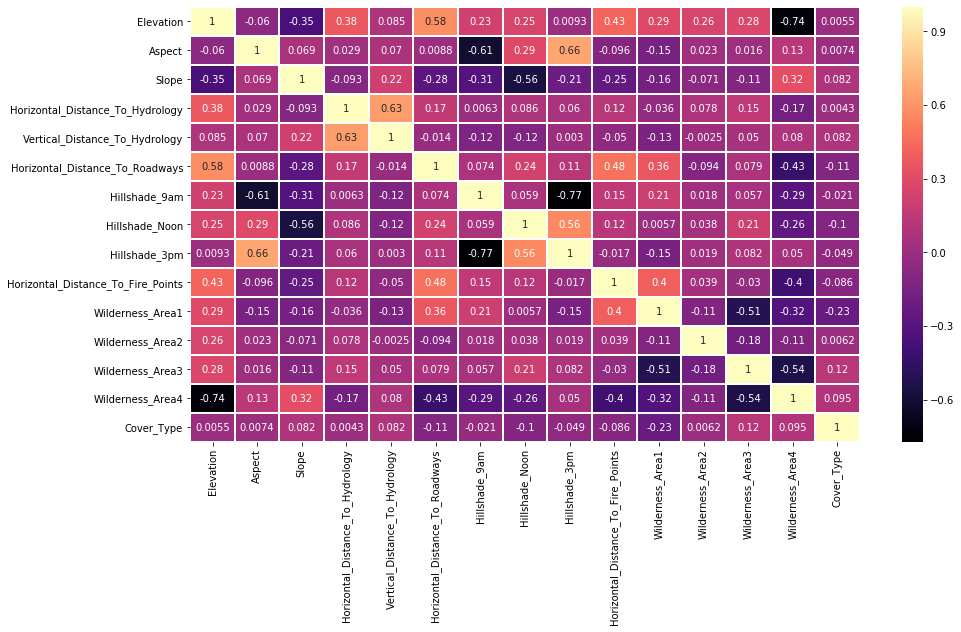

In [94]:
plt.figure(figsize=(15,8))
sns.heatmap(edadf.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

From the above heatmap we can see a lot of multicollinearity between the independent variables, lets see what are those variables below:

In [120]:
multicorrelation(edadf,0.65)

  
    Correlation with more than : 0.65


Corr Value 		 Fearture1 			 Feature 2
0.6645240742528696 	 Hillshade_3pm 			 Aspect
-0.7720290497126205 	 Hillshade_3pm 			 Hillshade_9am
-0.737082769552578 	 Wilderness_Area4 			 Elevation


 The above mentioned correlations only are present in the given Dataset


Hence if we drop the Hillshade_3pm it will break two multicollinearities 

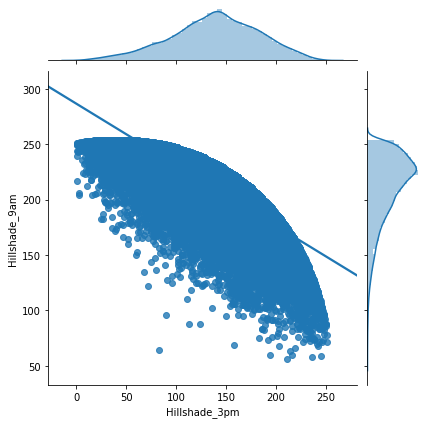

In [144]:
sns.jointplot('Hillshade_3pm','Hillshade_9am',data=df,kind='reg')

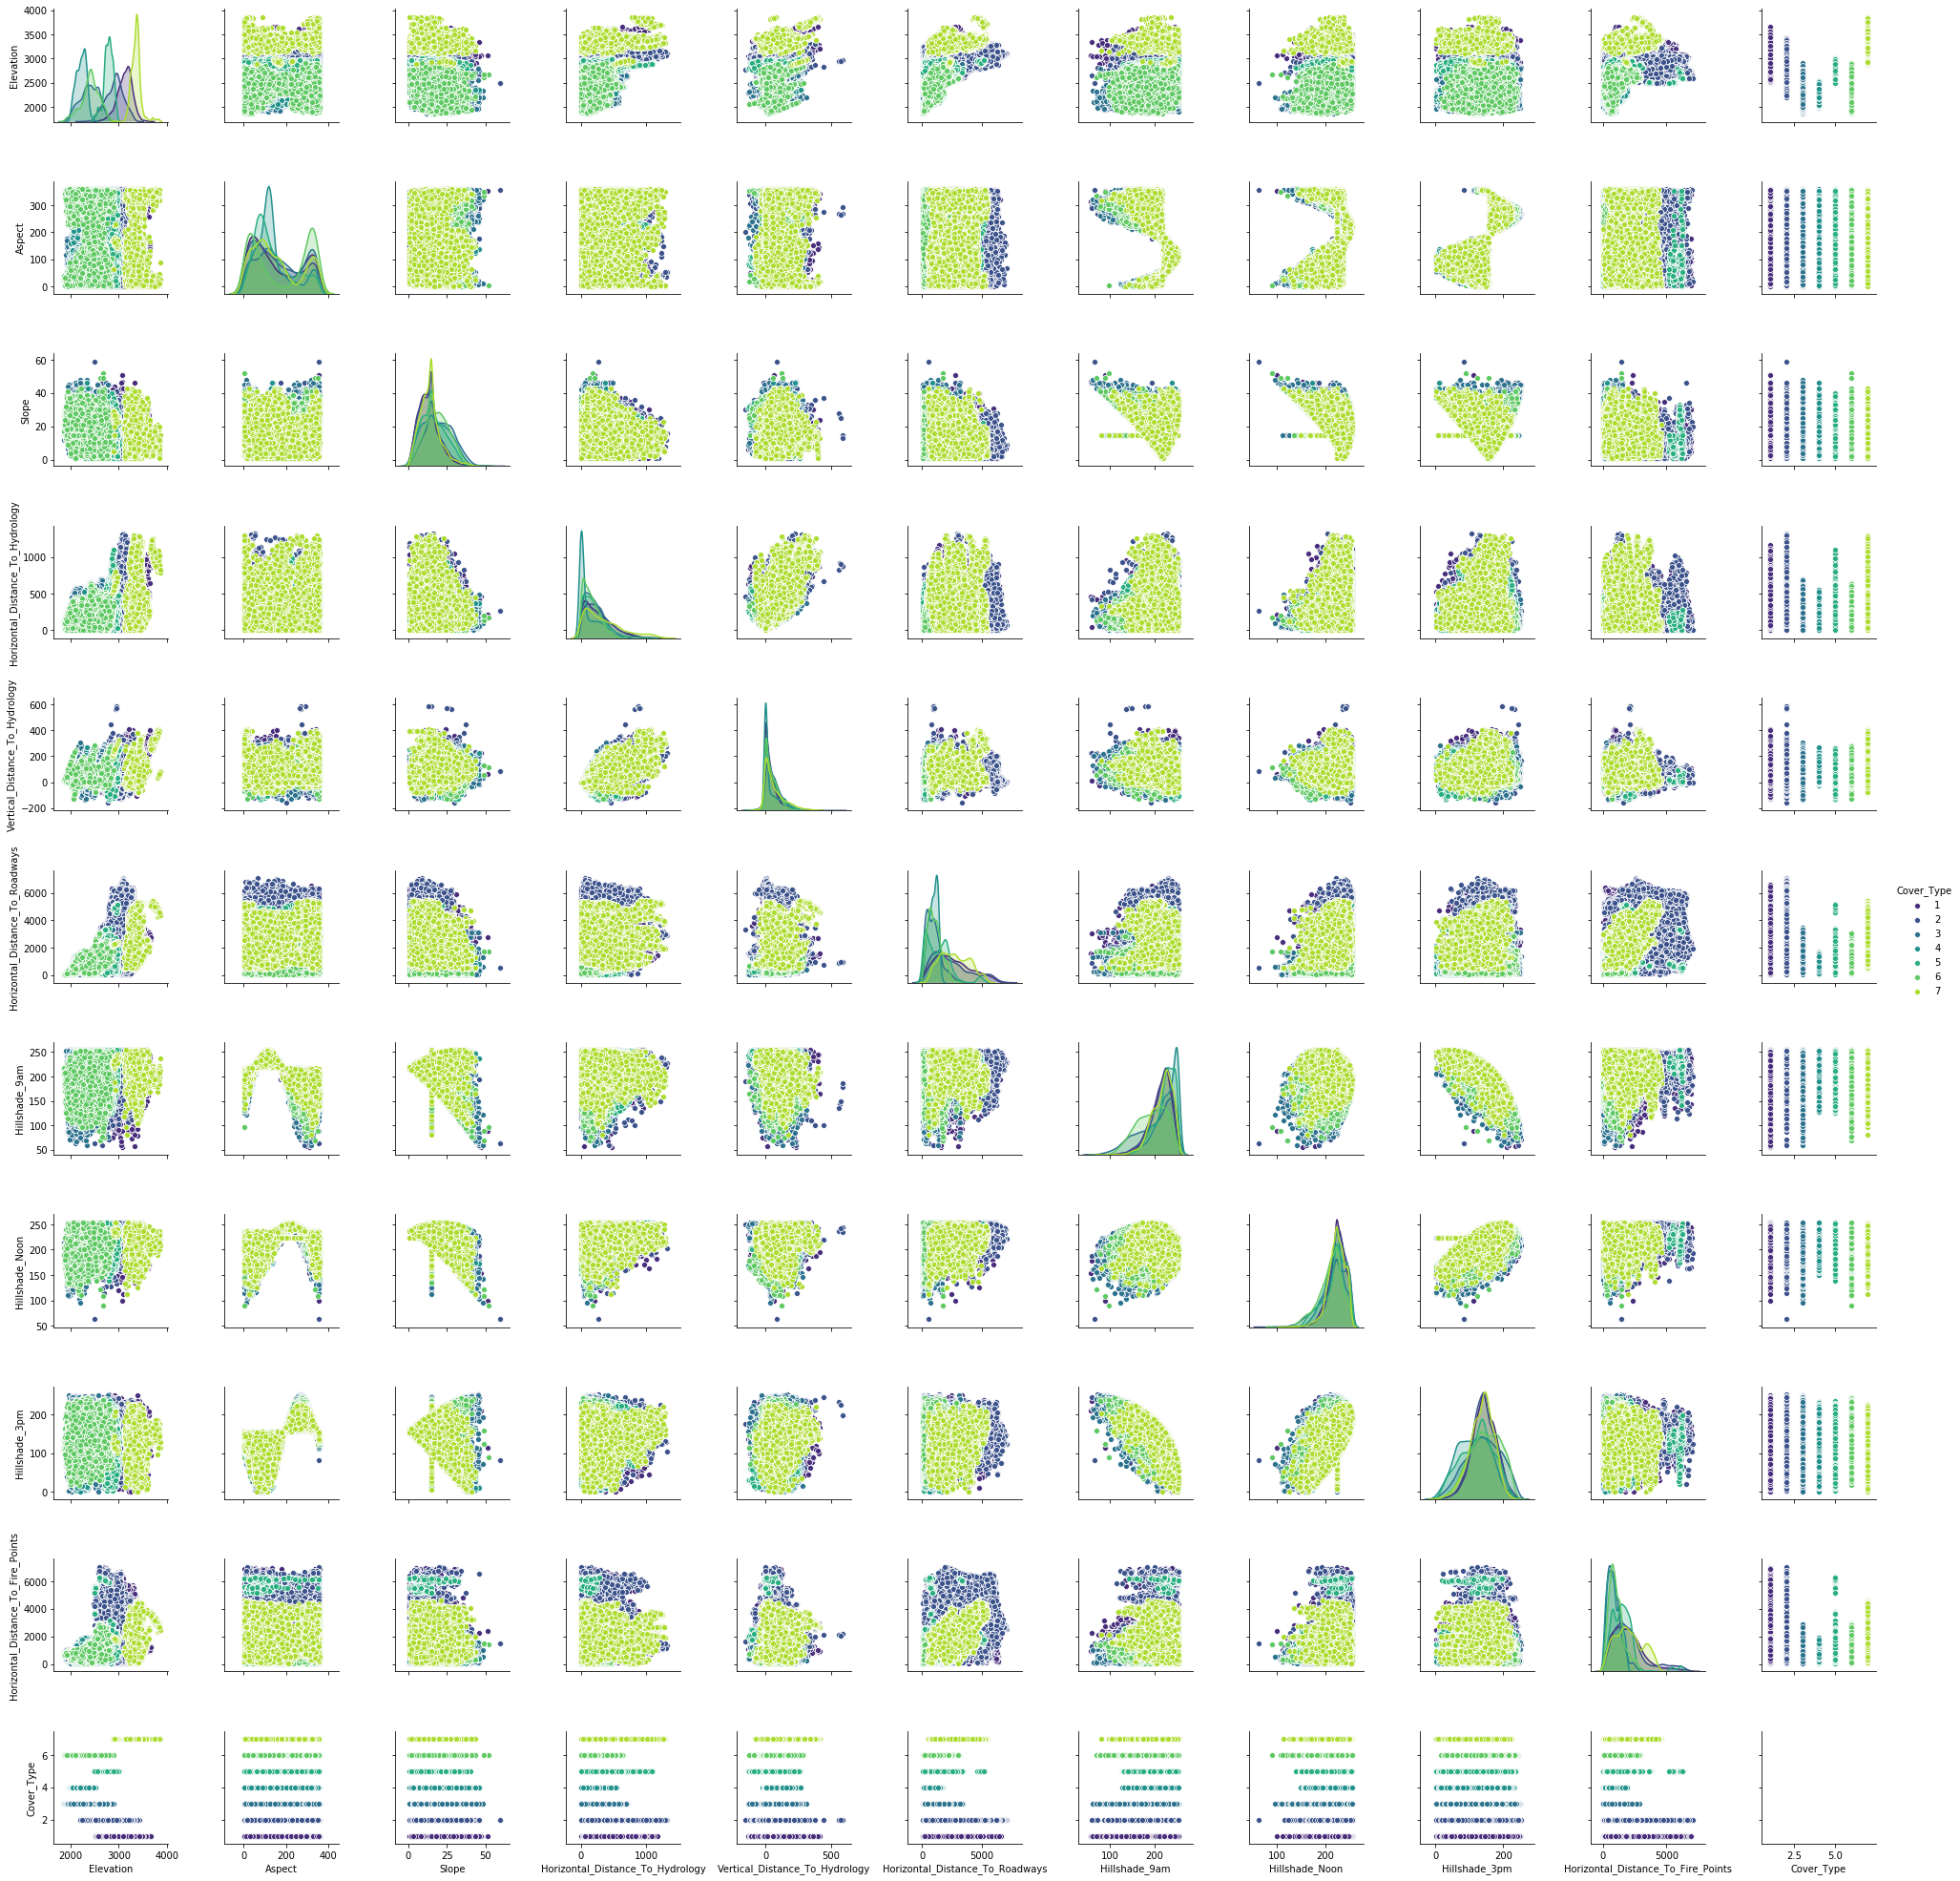

In [130]:
xvar1= edadf.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
yvar1= edadf['Cover_Type']
paiplt=pd.concat([xvar1,yvar1],axis=1)
sns.pairplot(paiplt,hue='Cover_Type',palette='viridis')

From above plot we can see an overview that Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points can seperate the data well. Lets see in detail below

In [134]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,164.0,1290.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,110.0,2911.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,189.0,1952.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,209.0,722.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,169.0,700.0,...,0,0,0,0,0,0,0,0,0,0


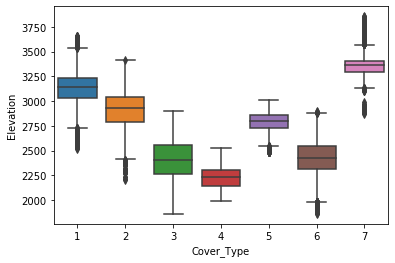

In [135]:
sns.boxplot('Cover_Type','Elevation',data=df)

as we can see above the Elevation feature's data didn't overlap with each other much and shows variations in data for all types of Forest covers, hence this will be a good feature to classify the datapoints

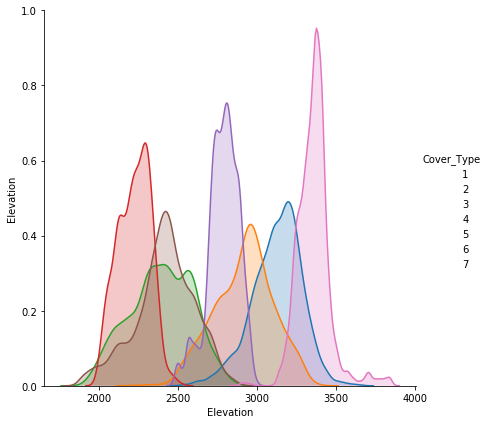

In [159]:
sns.pairplot(x_vars='Elevation',y_vars='Elevation',hue='Cover_Type',data=df,size=6,height=5)
plt.show()

From above we can see that the distribution of Elevation Feature over the Cover types which can show that all the covertypes are having different distributions

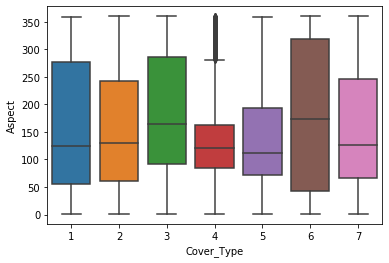

In [136]:
sns.boxplot('Cover_Type','Aspect',data=df)

Here there isn't much of a variation between the cover types and all data are overlapping on one another

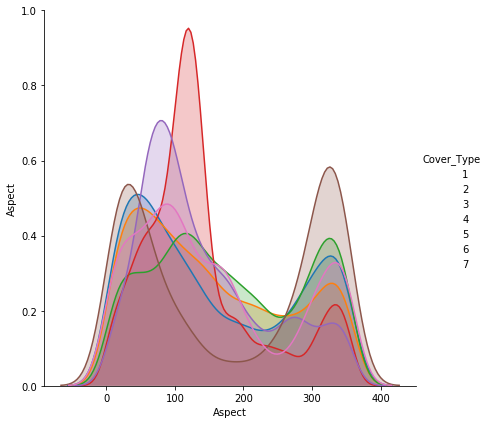

In [160]:
sns.pairplot(x_vars='Aspect',y_vars='Aspect',hue='Cover_Type',data=df,size=6,height=5)
plt.show()

As an evident all the covertypes are overlapped with each other and it wil be hard to cite the particular type based on this Aspect Feature

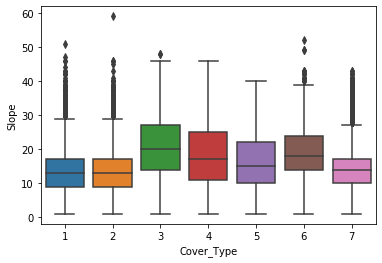

In [143]:
sns.boxplot('Cover_Type','Slope',data=df)

Even in Slope feature all the data points are overlapping with each other and hard to classify the data based on this feature

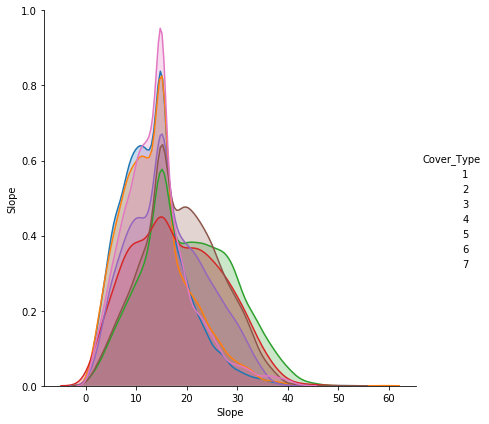

In [161]:
sns.pairplot(x_vars='Slope',y_vars='Slope',hue='Cover_Type',data=df,size=6,height=5)
plt.show()

Hence we finally decise to take out the Hillshade_3pm feature alone to remove the multicollinearity 

In [3]:
df.drop('Hillshade_3pm',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape


<div class="alert alert-block alert-info">
<b><font size="4">Model Evaluation strategy (Metrics Selection)</font></b>
</div>
 

From the Objective of Model building we can infer that we cannot tolerate False Negatives when compared with False Positives   

(ie) if we predicted that a certain tree can be grown in that specific area and we made efforts to sow the seeds and atlast
it didnt grow at all as its incorrectly predicted(False Negatives) will lead to waste of effort and money whcih is not tolerable rather than if we predicted it wont grow in the particular area.    

Hence this problem is a Recall-Oriented model and will be using both ROC and Precison-Recall
curve to establish a clear model by using AUC score (As it will be a good predictor in both ROC and Presision-recall curves)

And we will be averaging all the recall scores based on Micro method as we are having imbalanced dataset  we need to give equal weights to instances rather than equal weight to classes

In [4]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,recall_score,roc_auc_score
from sklearn.metrics import roc_curve,precision_score,f1_score


<div class="alert alert-block alert-info">
<b><font size="4">  Data Partitioning</font></b>
</div>


In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
1,2655.0,339.0,8.0,0.0,0.0,1441.0,203.0,228.0,1290.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3179.0,131.0,16.0,60.0,-30.0,2431.0,244.0,230.0,2911.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3380.0,297.0,12.0,371.0,58.0,3895.0,187.0,236.0,1952.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,1928.0,270.0,17.0,30.0,8.0,270.0,173.0,244.0,722.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2437.0,340.0,21.0,162.0,81.0,553.0,171.0,204.0,700.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x=df.drop('Cover_Type',axis=1)
y=df['Cover_Type']

In [6]:
print(df.shape, x.shape, y.shape)

(60261, 53) (60261, 52) (60261,)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Here we will split the data based on Stratification method so that to preserve the distribution of classes 
# in both train and test set
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42,stratify =y)

In [9]:
print(x_train.shape,y_train.shape)

(42182, 52) (42182,)


In [10]:
print(x_test.shape,y_test.shape)

(18079, 52) (18079,)



<div class="alert alert-block alert-info">
<b><font size="4"> Feature Scaling</font></b>
</div>


There are various methods of scaling such as MinMaxScaling, StandardScaler, Normalizer , MaxAbsScaler , RobustScaler and Normalizer

But here we will be using MinMaxScaler as we need to preserve the distribution of each class in data but incase of Standard scaler it will assume all features is normally distributed and make them similar which won't be helpful in this case as we need to classify the datapoints.
And the only disadvantage of MinMaxScaler is it can be afftected by outliers but as we are not going to do any Regression models over the classification problems it will not affect our models

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scale= MinMaxScaler()

In [13]:
scale.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
x_train_sc=scale.transform(x_train)
x_test_sc=scale.transform(x_test)

In [15]:
print(x_train_sc.shape,x_test_sc.shape)

(42182, 52) (18079, 52)


<div class="alert alert-block alert-info">
<b><font size="5"> Voting Classifier- Hard</font></b>
</div>

Three models are used in voting classifier

In [21]:
#  Three models are used in voting classifier

knn=KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
svcrbf = SVC(kernel='rbf', random_state=42,C=15, gamma=10)
rftree = RandomForestClassifier(n_jobs=-1,random_state=42,criterion='gini',n_estimators=400,max_depth=50)

estimators=[('KNearestNeighbors', knn), ('SVC-RBF', svcrbf), ('RandomForestClassifier', rftree)]

In [18]:
from sklearn.ensemble import VotingClassifier

In [19]:
voting_clf = VotingClassifier(estimators=estimators, voting='hard',n_jobs=-1) #HARD VOTING

In [21]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
for clf in (knn,svcrbf,rftree,voting_clf):
    clf.fit(x_train_sc, y_train)
    y_pred = clf.predict(x_test_sc)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.863819901543227
SVC 0.8795840477902539
RandomForestClassifier 0.9067979423640689
VotingClassifier 0.8962885115327175


<div class="alert alert-block alert-success">
From above we can see that the voting classifier does better than KNN and SVC RB model and almost near to Random Forest

In [23]:
voting_clf = VotingClassifier(estimators=estimators, voting='hard',n_jobs=-1)
voting_clf.fit(x_train_sc, y_train)
y_pred=voting_clf.predict(x_test_sc)
print('Training score         :',voting_clf.score(x_train_sc,y_train).round(5))
print('Test score             :',voting_clf.score(x_test_sc,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')

Training score         : 1.0
Test score             : 0.89629

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2661,338,1,0,21,8,107
2,416,1972,33,0,136,48,11
3,0,12,3068,51,12,261,0
4,0,0,56,641,0,22,0
5,9,29,22,0,2279,11,0
6,4,11,181,23,7,2794,0
7,42,1,0,0,2,0,2789



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.85      0.85      0.85      3136
          2       0.83      0.75      0.79      2616
          3       0.91      0.90      0.91      3404
          4       0.90      0.89      0.89       719
          5       0.93      0.97      0.95      2350
          6       0.89      0.93      0.91      3020
          7       0.96      0.98      0.97      2834

avg / total       0.90      0.90      0.90     18079

   micro avg	   0.9      0.9      0.9
--------------------------------------------------------------------------


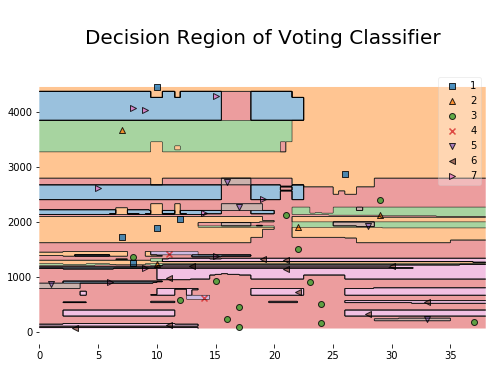

In [28]:
from mlxtend.plotting import plot_decision_regions
X_b = x_train.iloc[100:150,[2,5]].values
y_b = y_train[100:150].values
voting_clft = VotingClassifier(estimators=estimators, voting='hard',n_jobs=-1)
voting_clft.fit(X_b, y_b) 
plt.figure(figsize=(8,5))
plot_decision_regions(X_b, y_b, clf = voting_clft);
plt.title('\nDecision Region of Voting Classifier\n',fontsize=20);

<div class="alert alert-block alert-info">
<b><font size="5"> Voting Classifier- Soft</font></b>
</div>

Three models are used in voting classifier                        

• The soft voting is based on the predic proba method of the models, hence we need to put only the model which supports the predict proba function

In [29]:
knn=KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
svcrbf = SVC(kernel='rbf', random_state=42,C=15, gamma=10,probability=True)#by putting probability =True we can make it as predict proba function
rftree = RandomForestClassifier(n_jobs=-1,random_state=42,criterion='gini',n_estimators=400,max_depth=50)

estimators=[('KNearestNeighbors', knn), ('SVC-RBF', svcrbf), ('RandomForestClassifier', rftree)]

In [30]:
voting_clf = VotingClassifier(estimators=estimators, voting='soft',n_jobs=-1) #SOFT VOTING

In [31]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
for clf in (knn,svcrbf,rftree,voting_clf):
    clf.fit(x_train_sc, y_train)
    y_pred = clf.predict(x_test_sc)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.863819901543227
SVC 0.8795840477902539
RandomForestClassifier 0.9067979423640689
VotingClassifier 0.8856131423198186


<div class="alert alert-block alert-success">
From above we can see that the Soft Voting classifier yields slighltly lesser accuracy(0.8856) than Hard Voting Classifier(0.8962)

In [32]:
voting_clf = VotingClassifier(estimators=estimators, voting='soft',n_jobs=-1)
voting_clf.fit(x_train_sc, y_train)
y_pred=voting_clf.predict(x_test_sc)
print('\nTraining score         :',voting_clf.score(x_train_sc,y_train).round(5))
print('Test score             :',voting_clf.score(x_test_sc,y_test).round(5))
print('\n\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')


Training score         : 1.0
Test score             : 0.88561


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2614,372,1,0,25,9,115
2,416,1942,33,0,151,58,16
3,0,13,3031,57,14,289,0
4,0,0,61,624,0,34,0
5,8,29,19,0,2280,14,0
6,2,14,226,29,13,2736,0
7,45,3,0,0,2,0,2784



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.85      0.83      0.84      3136
          2       0.82      0.74      0.78      2616
          3       0.90      0.89      0.89      3404
          4       0.88      0.87      0.87       719
          5       0.92      0.97      0.94      2350
          6       0.87      0.91      0.89      3020
          7       0.96      0.98      0.97      2834

avg / total       0.88      0.89      0.88     18079

   micro avg	   0.89      0.89      0.89
--------------------------------------------------------------------------


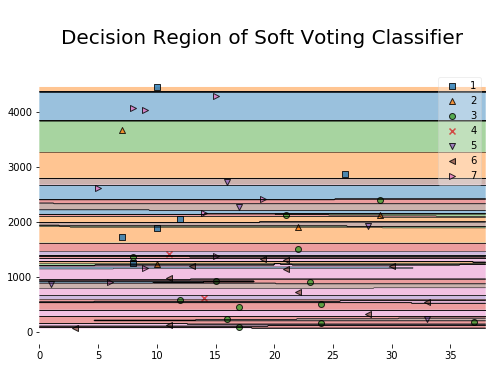

In [33]:
from mlxtend.plotting import plot_decision_regions
X_b = x_train.iloc[100:150,[2,5]].values
y_b = y_train[100:150].values
voting_clft = VotingClassifier(estimators=estimators, voting='soft',n_jobs=-1)
voting_clft.fit(X_b, y_b) 
plt.figure(figsize=(8,5))
plot_decision_regions(X_b, y_b, clf = voting_clft);
plt.title('\nDecision Region of Soft Voting Classifier\n',fontsize=20);

<div class="alert alert-block alert-info">
<b><font size="5"> Bagging</font></b>
</div>

### 1).   K Neighbors Classifier

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for n in [25,50,100]:
    knn=KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    bag_clf = BaggingClassifier(knn, n_estimators=n, bootstrap=True, oob_score=True, random_state=42,
                               max_samples=0.9)

    bag_clf.fit(x_train_sc, y_train)
    y_pred = bag_clf.predict(x_test_sc)
    print('\nFor n_estimators = ',n)
    print('\nTraining score         :',bag_clf.score(x_train_sc,y_train).round(5))
    print('Test score             :',bag_clf.score(x_test_sc,y_test).round(5))
    print('\n\nThe Confusion Matrix is plotted below:')
    display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
    print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
    print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
    f1_score(y_test, y_pred, average='micro').round(2) )
    print('--------------------------------------------------------------------------')


For n_estimators =  25

Training score         : 0.99154
Test score             : 0.86354


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2530,414,1,0,45,12,134
2,445,1869,36,1,185,61,19
3,1,19,2919,85,23,357,0
4,0,0,71,605,0,43,0
5,17,46,19,0,2250,18,0
6,4,23,277,28,23,2665,0
7,55,3,0,0,2,0,2774



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.83      0.81      0.82      3136
          2       0.79      0.71      0.75      2616
          3       0.88      0.86      0.87      3404
          4       0.84      0.84      0.84       719
          5       0.89      0.96      0.92      2350
          6       0.84      0.88      0.86      3020
          7       0.95      0.98      0.96      2834

avg / total       0.86      0.86      0.86     18079

   micro avg	   0.86      0.86      0.86
--------------------------------------------------------------------------

For n_estimators =  50

Training score         : 0.99649
Test score             : 0.86459


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2536,416,1,0,41,12,130
2,441,1878,34,1,184,61,17
3,1,19,2930,85,21,348,0
4,0,0,72,605,0,42,0
5,17,47,18,0,2251,17,0
6,4,22,285,29,23,2657,0
7,54,4,0,0,2,0,2774



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.83      0.81      0.82      3136
          2       0.79      0.72      0.75      2616
          3       0.88      0.86      0.87      3404
          4       0.84      0.84      0.84       719
          5       0.89      0.96      0.92      2350
          6       0.85      0.88      0.86      3020
          7       0.95      0.98      0.96      2834

avg / total       0.86      0.86      0.86     18079

   micro avg	   0.86      0.86      0.86
--------------------------------------------------------------------------

For n_estimators =  100

Training score         : 0.99912
Test score             : 0.8641


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2533,419,1,0,40,12,131
2,447,1872,34,1,185,60,17
3,1,19,2931,84,21,348,0
4,0,0,72,604,0,43,0
5,17,46,18,0,2252,17,0
6,4,21,286,30,23,2656,0
7,54,4,0,0,2,0,2774



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.83      0.81      0.82      3136
          2       0.79      0.72      0.75      2616
          3       0.88      0.86      0.87      3404
          4       0.84      0.84      0.84       719
          5       0.89      0.96      0.92      2350
          6       0.85      0.88      0.86      3020
          7       0.95      0.98      0.96      2834

avg / total       0.86      0.86      0.86     18079

   micro avg	   0.86      0.86      0.86
--------------------------------------------------------------------------


<div class="alert alert-block alert-success">

From  above we can see that when n_estimators = 50 the model yields the better accuracy score(0.8645) when compared with the model without Bagging (accuracy score = 0.8632)

### 2).  Logistic Regression

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
for n in [25,50,100]:
    log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",n_jobs=-1,random_state=42,penalty='l2',C=30)
    bag_clf = BaggingClassifier(log_reg, n_estimators=n, bootstrap=True, oob_score=True, random_state=42,
                               max_samples=0.9)

    bag_clf.fit(x_train_sc, y_train)
    y_pred = bag_clf.predict(x_test_sc)
    print('\nFor n_estimators = ',n)
    print('\nTraining score         :',bag_clf.score(x_train_sc,y_train).round(5))
    print('Test score             :',bag_clf.score(x_test_sc,y_test).round(5))
    print('\n\nThe Confusion Matrix is plotted below:')
    display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
    print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
    print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
    f1_score(y_test, y_pred, average='micro').round(2) )
    print('--------------------------------------------------------------------------')


For n_estimators =  25

Training score         : 0.68266
Test score             : 0.6892


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2205,443,3,0,94,38,353
2,714,1296,58,0,399,125,24
3,0,14,2292,171,92,835,0
4,0,0,176,440,0,103,0
5,35,329,87,0,1793,106,0
6,0,31,852,75,106,1956,0
7,345,0,2,0,9,0,2478



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.67      0.70      0.69      3136
          2       0.61      0.50      0.55      2616
          3       0.66      0.67      0.67      3404
          4       0.64      0.61      0.63       719
          5       0.72      0.76      0.74      2350
          6       0.62      0.65      0.63      3020
          7       0.87      0.87      0.87      2834

avg / total       0.69      0.69      0.69     18079

   micro avg	   0.69      0.69      0.69
--------------------------------------------------------------------------

For n_estimators =  50

Training score         : 0.68266
Test score             : 0.68909


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2197,447,3,0,95,38,356
2,710,1301,58,0,400,123,24
3,0,11,2302,169,95,827,0
4,0,0,177,438,0,104,0
5,35,330,87,0,1794,104,0
6,0,33,855,76,109,1947,0
7,344,0,2,0,9,0,2479



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.67      0.70      0.68      3136
          2       0.61      0.50      0.55      2616
          3       0.66      0.68      0.67      3404
          4       0.64      0.61      0.62       719
          5       0.72      0.76      0.74      2350
          6       0.62      0.64      0.63      3020
          7       0.87      0.87      0.87      2834

avg / total       0.69      0.69      0.69     18079

   micro avg	   0.69      0.69      0.69
--------------------------------------------------------------------------

For n_estimators =  100

Training score         : 0.68332
Test score             : 0.68892


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2205,441,4,0,92,38,356
2,718,1293,57,0,400,124,24
3,0,13,2307,171,94,819,0
4,0,0,177,440,0,102,0
5,35,327,86,0,1795,107,0
6,0,33,862,78,112,1935,0
7,343,0,2,0,9,0,2480



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.67      0.70      0.69      3136
          2       0.61      0.49      0.55      2616
          3       0.66      0.68      0.67      3404
          4       0.64      0.61      0.62       719
          5       0.72      0.76      0.74      2350
          6       0.62      0.64      0.63      3020
          7       0.87      0.88      0.87      2834

avg / total       0.69      0.69      0.69     18079

   micro avg	   0.69      0.69      0.69
--------------------------------------------------------------------------


<div class="alert alert-block alert-success">

From  above we can see that when n_estimators = 25 the model yields the better accuracy score(0.86) when compared with the model without Bagging (accuracy score = 0.8632)

<div class="alert alert-block alert-info">
<b><font size="5"> Pasting</font></b>
</div>

### 1). Decision Tree

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
for n in [100,200,300]:
    dtree = DecisionTreeClassifier(max_depth=28,random_state=999)
    bag_clf = BaggingClassifier(dtree, n_estimators=n, bootstrap=False,random_state=42)
    bag_clf.fit(x_train_sc, y_train)
    y_pred = bag_clf.predict(x_test_sc)
    print('\nFor n_estimators = ',n)
    print('\nTraining score         :',bag_clf.score(x_train_sc,y_train).round(5))
    print('Test score             :',bag_clf.score(x_test_sc,y_test).round(5))
    print('\n\nThe Confusion Matrix is plotted below:')
    display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
    print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
    print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
    f1_score(y_test, y_pred, average='micro').round(2) )
    print('--------------------------------------------------------------------------')


For n_estimators =  100

Training score         : 0.99656
Test score             : 0.85364


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2487,478,5,0,41,6,119
2,561,1778,57,0,150,54,16
3,1,34,3010,56,19,284,0
4,0,0,67,620,0,32,0
5,28,101,25,0,2180,16,0
6,1,47,263,45,28,2636,0
7,107,4,0,0,1,0,2722



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.78      0.79      0.79      3136
          2       0.73      0.68      0.70      2616
          3       0.88      0.88      0.88      3404
          4       0.86      0.86      0.86       719
          5       0.90      0.93      0.91      2350
          6       0.87      0.87      0.87      3020
          7       0.95      0.96      0.96      2834

avg / total       0.85      0.85      0.85     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------

For n_estimators =  200

Training score         : 0.99656
Test score             : 0.85475


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2492,474,5,0,40,7,118
2,560,1780,58,1,149,53,15
3,1,33,3011,56,19,284,0
4,0,0,67,621,0,31,0
5,29,97,24,0,2183,17,0
6,1,46,261,44,26,2642,0
7,105,4,0,0,1,0,2724



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.78      0.79      0.79      3136
          2       0.73      0.68      0.70      2616
          3       0.88      0.88      0.88      3404
          4       0.86      0.86      0.86       719
          5       0.90      0.93      0.92      2350
          6       0.87      0.87      0.87      3020
          7       0.95      0.96      0.96      2834

avg / total       0.85      0.85      0.85     18079

   micro avg	   0.85      0.85      0.85
--------------------------------------------------------------------------

For n_estimators =  300

Training score         : 0.99659
Test score             : 0.85508


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2487,478,5,0,41,7,118
2,558,1784,58,0,147,54,15
3,1,32,3015,55,19,282,0
4,0,0,66,623,0,30,0
5,29,97,24,0,2183,17,0
6,1,46,259,43,26,2645,0
7,106,5,0,0,1,0,2722



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.78      0.79      0.79      3136
          2       0.73      0.68      0.71      2616
          3       0.88      0.89      0.88      3404
          4       0.86      0.87      0.87       719
          5       0.90      0.93      0.92      2350
          6       0.87      0.88      0.87      3020
          7       0.95      0.96      0.96      2834

avg / total       0.85      0.86      0.85     18079

   micro avg	   0.86      0.86      0.86
--------------------------------------------------------------------------


<div class="alert alert-block alert-success">

From  above we can see that when n_estimators = 300 the model yields the better accuracy score(0.85508) when compared with the model without Bagging (accuracy score = 0.84795)

### 2).  Logistic Regression

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
for n in [25,50,100]:
    log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",n_jobs=-1,random_state=42,penalty='l2',C=30)
    bag_clf = BaggingClassifier(log_reg, n_estimators=n, bootstrap=False, random_state=42)
    bag_clf.fit(x_train_sc, y_train)
    y_pred = bag_clf.predict(x_test_sc)
    print('\nFor n_estimators = ',n)
    print('\nTraining score         :',bag_clf.score(x_train_sc,y_train).round(5))
    print('Test score             :',bag_clf.score(x_test_sc,y_test).round(5))
    print('\n\nThe Confusion Matrix is plotted below:')
    display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
    print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
    print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
    f1_score(y_test, y_pred, average='micro').round(2) )
    print('--------------------------------------------------------------------------')


For n_estimators =  25

Training score         : 0.68155
Test score             : 0.68765


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2199,446,4,0,93,36,358
2,710,1304,58,0,401,119,24
3,0,18,2270,168,94,854,0
4,0,0,178,431,0,110,0
5,40,347,89,0,1767,107,0
6,0,37,834,74,100,1975,0
7,337,0,0,0,11,0,2486



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.67      0.70      0.68      3136
          2       0.61      0.50      0.55      2616
          3       0.66      0.67      0.66      3404
          4       0.64      0.60      0.62       719
          5       0.72      0.75      0.73      2350
          6       0.62      0.65      0.63      3020
          7       0.87      0.88      0.87      2834

avg / total       0.69      0.69      0.69     18079

   micro avg	   0.69      0.69      0.69
--------------------------------------------------------------------------

For n_estimators =  50

Training score         : 0.68155
Test score             : 0.68765


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2199,446,4,0,93,36,358
2,710,1304,58,0,401,119,24
3,0,18,2270,168,94,854,0
4,0,0,178,431,0,110,0
5,40,347,89,0,1767,107,0
6,0,37,834,74,100,1975,0
7,337,0,0,0,11,0,2486



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.67      0.70      0.68      3136
          2       0.61      0.50      0.55      2616
          3       0.66      0.67      0.66      3404
          4       0.64      0.60      0.62       719
          5       0.72      0.75      0.73      2350
          6       0.62      0.65      0.63      3020
          7       0.87      0.88      0.87      2834

avg / total       0.69      0.69      0.69     18079

   micro avg	   0.69      0.69      0.69
--------------------------------------------------------------------------

For n_estimators =  100

Training score         : 0.68155
Test score             : 0.68765


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2199,446,4,0,93,36,358
2,710,1304,58,0,401,119,24
3,0,18,2270,168,94,854,0
4,0,0,178,431,0,110,0
5,40,347,89,0,1767,107,0
6,0,37,834,74,100,1975,0
7,337,0,0,0,11,0,2486



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.67      0.70      0.68      3136
          2       0.61      0.50      0.55      2616
          3       0.66      0.67      0.66      3404
          4       0.64      0.60      0.62       719
          5       0.72      0.75      0.73      2350
          6       0.62      0.65      0.63      3020
          7       0.87      0.88      0.87      2834

avg / total       0.69      0.69      0.69     18079

   micro avg	   0.69      0.69      0.69
--------------------------------------------------------------------------


<div class="alert alert-block alert-success">

From  above we can see that all the n_estimators of the model yields the same accuracy score(0.6876) when compared with the model without Bagging (accuracy score = 0.6876)

<div class="alert alert-block alert-info">
<b><font size="5"> AdaBoosting</font></b>
</div>

### 1). Decision Tree

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:

for l in [0.1,0.5,1]:
    for n in [40,60,80]:
        dtree = DecisionTreeClassifier(max_depth=28,random_state=999)
        bst=AdaBoostClassifier(dtree,n_estimators=n,learning_rate=l,random_state=999)
        bst.fit(x_train_sc, y_train)
        y_pred = bst.predict(x_test_sc)
        print('\nFor learning rate = ',l,' and n_estimators = ',n )
        print('\nTraining score         :',bst.score(x_train_sc,y_train).round(5))
        print('Test score             :',bst.score(x_test_sc,y_test).round(5))
        print('\n\nThe Confusion Matrix is plotted below:')
        display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
        print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
        print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
              f1_score(y_test, y_pred, average='micro').round(2) )
        print('--------------------------------------------------------------------------')


For learning rate =  0.1  and n_estimators =  40

Training score         : 1.0
Test score             : 0.86769


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2526,455,4,0,26,5,120
2,475,1919,49,0,109,45,19
3,1,31,3006,71,20,275,0
4,0,0,67,615,0,37,0
5,10,77,25,0,2219,19,0
6,2,31,247,30,23,2687,0
7,114,5,0,0,0,0,2715



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.81      0.81      0.81      3136
          2       0.76      0.73      0.75      2616
          3       0.88      0.88      0.88      3404
          4       0.86      0.86      0.86       719
          5       0.93      0.94      0.93      2350
          6       0.88      0.89      0.88      3020
          7       0.95      0.96      0.95      2834

avg / total       0.87      0.87      0.87     18079

   micro avg	   0.87      0.87      0.87
--------------------------------------------------------------------------

For learning rate =  0.1  and n_estimators =  60

Training score         : 1.0
Test score             : 0.86769


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2526,455,4,0,26,5,120
2,475,1919,49,0,109,45,19
3,1,31,3006,71,20,275,0
4,0,0,67,615,0,37,0
5,10,77,25,0,2219,19,0
6,2,31,247,30,23,2687,0
7,114,5,0,0,0,0,2715



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.81      0.81      0.81      3136
          2       0.76      0.73      0.75      2616
          3       0.88      0.88      0.88      3404
          4       0.86      0.86      0.86       719
          5       0.93      0.94      0.93      2350
          6       0.88      0.89      0.88      3020
          7       0.95      0.96      0.95      2834

avg / total       0.87      0.87      0.87     18079

   micro avg	   0.87      0.87      0.87
--------------------------------------------------------------------------

For learning rate =  0.1  and n_estimators =  80

Training score         : 1.0
Test score             : 0.86769


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2526,455,4,0,26,5,120
2,475,1919,49,0,109,45,19
3,1,31,3006,71,20,275,0
4,0,0,67,615,0,37,0
5,10,77,25,0,2219,19,0
6,2,31,247,30,23,2687,0
7,114,5,0,0,0,0,2715



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.81      0.81      0.81      3136
          2       0.76      0.73      0.75      2616
          3       0.88      0.88      0.88      3404
          4       0.86      0.86      0.86       719
          5       0.93      0.94      0.93      2350
          6       0.88      0.89      0.88      3020
          7       0.95      0.96      0.95      2834

avg / total       0.87      0.87      0.87     18079

   micro avg	   0.87      0.87      0.87
--------------------------------------------------------------------------

For learning rate =  0.5  and n_estimators =  40

Training score         : 1.0
Test score             : 0.90945


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2721,316,1,0,21,4,73
2,401,2023,42,0,96,40,14
3,0,9,3142,46,10,197,0
4,0,0,33,655,0,31,0
5,3,18,19,0,2301,9,0
6,0,9,171,31,6,2803,0
7,34,3,0,0,0,0,2797



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.86      0.87      0.86      3136
          2       0.85      0.77      0.81      2616
          3       0.92      0.92      0.92      3404
          4       0.89      0.91      0.90       719
          5       0.95      0.98      0.96      2350
          6       0.91      0.93      0.92      3020
          7       0.97      0.99      0.98      2834

avg / total       0.91      0.91      0.91     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For learning rate =  0.5  and n_estimators =  60

Training score         : 1.0
Test score             : 0.91244


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2733,307,1,0,23,4,68
2,404,2029,40,0,84,46,13
3,0,9,3150,46,8,191,0
4,0,0,33,659,0,27,0
5,3,20,18,0,2303,6,0
6,0,8,151,29,6,2826,0
7,35,3,0,0,0,0,2796



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.86      0.87      0.87      3136
          2       0.85      0.78      0.81      2616
          3       0.93      0.93      0.93      3404
          4       0.90      0.92      0.91       719
          5       0.95      0.98      0.96      2350
          6       0.91      0.94      0.92      3020
          7       0.97      0.99      0.98      2834

avg / total       0.91      0.91      0.91     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For learning rate =  0.5  and n_estimators =  80

Training score         : 1.0
Test score             : 0.91432


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2743,294,1,0,25,4,69
2,411,2026,46,0,78,43,12
3,0,8,3163,47,8,178,0
4,0,0,36,663,0,20,0
5,3,25,18,0,2298,6,0
6,0,8,137,26,6,2843,0
7,37,3,0,0,0,0,2794



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.86      0.87      0.87      3136
          2       0.86      0.77      0.81      2616
          3       0.93      0.93      0.93      3404
          4       0.90      0.92      0.91       719
          5       0.95      0.98      0.96      2350
          6       0.92      0.94      0.93      3020
          7       0.97      0.99      0.98      2834

avg / total       0.91      0.91      0.91     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For learning rate =  1  and n_estimators =  40

Training score         : 1.0
Test score             : 0.90868


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2690,342,0,0,20,5,79
2,431,2008,38,0,84,44,11
3,0,6,3171,46,11,170,0
4,0,0,42,654,0,23,0
5,3,32,18,0,2288,9,0
6,0,10,147,26,5,2832,0
7,47,1,0,0,1,0,2785



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.85      0.86      0.85      3136
          2       0.84      0.77      0.80      2616
          3       0.93      0.93      0.93      3404
          4       0.90      0.91      0.91       719
          5       0.95      0.97      0.96      2350
          6       0.92      0.94      0.93      3020
          7       0.97      0.98      0.98      2834

avg / total       0.91      0.91      0.91     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For learning rate =  1  and n_estimators =  60

Training score         : 1.0
Test score             : 0.9115


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2694,340,0,0,20,4,78
2,415,2036,40,0,71,42,12
3,0,4,3178,45,10,167,0
4,0,0,43,655,0,21,0
5,3,33,18,0,2287,9,0
6,0,12,131,25,5,2847,0
7,50,1,0,0,1,0,2782



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.85      0.86      0.86      3136
          2       0.84      0.78      0.81      2616
          3       0.93      0.93      0.93      3404
          4       0.90      0.91      0.91       719
          5       0.96      0.97      0.96      2350
          6       0.92      0.94      0.93      3020
          7       0.97      0.98      0.98      2834

avg / total       0.91      0.91      0.91     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------

For learning rate =  1  and n_estimators =  80

Training score         : 1.0
Test score             : 0.91194


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2698,342,0,0,18,4,74
2,407,2037,42,0,75,44,11
3,0,5,3176,44,10,169,0
4,0,0,41,655,0,23,0
5,3,34,18,0,2286,9,0
6,0,9,133,23,4,2851,0
7,47,2,0,0,1,0,2784



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.86      0.86      0.86      3136
          2       0.84      0.78      0.81      2616
          3       0.93      0.93      0.93      3404
          4       0.91      0.91      0.91       719
          5       0.95      0.97      0.96      2350
          6       0.92      0.94      0.93      3020
          7       0.97      0.98      0.98      2834

avg / total       0.91      0.91      0.91     18079

   micro avg	   0.91      0.91      0.91
--------------------------------------------------------------------------


<div class="alert alert-block alert-success">
From above we can see that the accuracy score is maximum when learning rate =0.5 and n_estimators=80 for the Adaboosting classifier

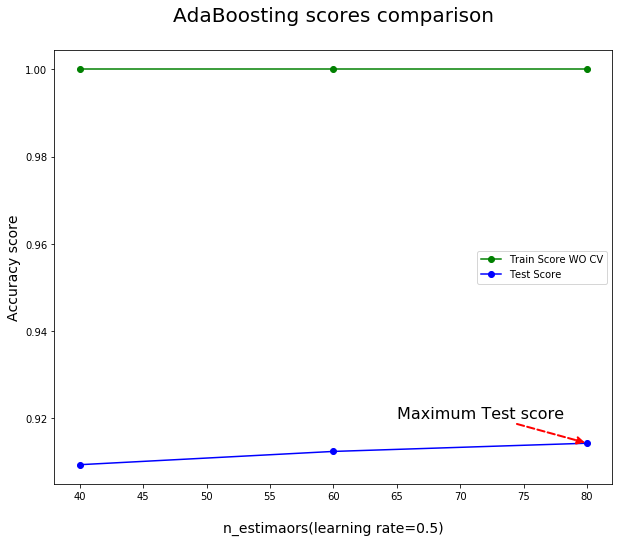

In [31]:
plt.figure(figsize=(10,8))
x_axis = [40,60,80]
plt.plot(x_axis, [1,1,1], c = 'g', label = 'Train Score WO CV',marker='o')
plt.plot(x_axis, [0.9094,0.91244,0.91432], c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('AdaBoosting scores comparison\n',fontsize=20)
plt.xlabel('\nn_estimaors(learning rate=0.5)',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
#plt.xticks(np.arange(0, 100,3))
plt.annotate("Maximum Test score",fontsize=16,xy=(80, 0.91432),xytext=(65, 0.92), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.show()

### 2). Logistic Regression

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
for l in [0.1,0.5,1]:
    for n in [40,60,80]:
        log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",n_jobs=-1,random_state=42,penalty='l2',C=30)
        bst=AdaBoostClassifier(log_reg,n_estimators=n,learning_rate=l,random_state=999)
        bst.fit(x_train_sc, y_train)
        y_pred = bst.predict(x_test_sc)
        print('\nFor learning rate = ',l,' and n_estimators = ',n )
        print('\nTraining score         :',bst.score(x_train_sc,y_train).round(5))
        print('Test score             :',bst.score(x_test_sc,y_test).round(5))
        print('\n\nThe Confusion Matrix is plotted below:')
        display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
        print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
        print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
              f1_score(y_test, y_pred, average='micro').round(2) )
        print('--------------------------------------------------------------------------')


For learning rate =  0.1  and n_estimators =  40

Training score         : 0.58252
Test score             : 0.59146


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2006,618,4,0,178,17,313
2,803,1263,49,0,381,110,10
3,0,6,2108,0,130,1160,0
4,0,0,496,0,0,223,0
5,191,575,209,0,1324,51,0
6,0,153,808,0,298,1761,0
7,522,40,9,0,32,0,2231


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.57      0.64      0.60      3136
          2       0.48      0.48      0.48      2616
          3       0.57      0.62      0.59      3404
          4       0.00      0.00      0.00       719
          5       0.57      0.56      0.56      2350
          6       0.53      0.58      0.56      3020
          7       0.87      0.79      0.83      2834

avg / total       0.57      0.59      0.58     18079

   micro avg	   0.59      0.59      0.59
--------------------------------------------------------------------------

For learning rate =  0.1  and n_estimators =  60

Training score         : 0.58497
Test score             : 0.59483


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1963,653,4,0,182,17,317
2,790,1284,49,0,375,108,10
3,0,8,2055,1,126,1214,0
4,0,0,473,2,0,244,0
5,149,600,209,0,1339,53,0
6,0,156,741,0,268,1855,0
7,484,54,9,0,31,0,2256



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.58      0.63      0.60      3136
          2       0.47      0.49      0.48      2616
          3       0.58      0.60      0.59      3404
          4       0.67      0.00      0.01       719
          5       0.58      0.57      0.57      2350
          6       0.53      0.61      0.57      3020
          7       0.87      0.80      0.83      2834

avg / total       0.60      0.59      0.59     18079

   micro avg	   0.59      0.59      0.59
--------------------------------------------------------------------------

For learning rate =  0.1  and n_estimators =  80

Training score         : 0.58546
Test score             : 0.59528


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2024,589,4,0,180,19,320
2,830,1246,49,0,374,107,10
3,0,17,1993,1,124,1269,0
4,0,0,448,6,0,265,0
5,135,617,209,0,1335,54,0
6,0,158,705,0,260,1897,0
7,479,60,9,0,25,0,2261



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.58      0.65      0.61      3136
          2       0.46      0.48      0.47      2616
          3       0.58      0.59      0.58      3404
          4       0.86      0.01      0.02       719
          5       0.58      0.57      0.57      2350
          6       0.53      0.63      0.57      3020
          7       0.87      0.80      0.83      2834

avg / total       0.61      0.60      0.59     18079

   micro avg	   0.6      0.6      0.6
--------------------------------------------------------------------------

For learning rate =  0.5  and n_estimators =  40

Training score         : 0.598
Test score             : 0.60872


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2168,463,4,0,167,14,320
2,952,1077,61,0,414,86,26
3,0,28,1892,2,109,1373,0
4,0,0,436,10,0,273,0
5,89,443,193,0,1569,56,0
6,0,164,623,0,205,2028,0
7,508,31,9,0,25,0,2261



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.58      0.69      0.63      3136
          2       0.49      0.41      0.45      2616
          3       0.59      0.56      0.57      3404
          4       0.83      0.01      0.03       719
          5       0.63      0.67      0.65      2350
          6       0.53      0.67      0.59      3020
          7       0.87      0.80      0.83      2834

avg / total       0.62      0.61      0.60     18079

   micro avg	   0.61      0.61      0.61
--------------------------------------------------------------------------

For learning rate =  0.5  and n_estimators =  60

Training score         : 0.59487
Test score             : 0.60446


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2131,416,4,0,193,11,381
2,954,961,67,0,476,89,69
3,0,27,1873,4,101,1399,0
4,0,0,435,28,0,256,0
5,88,392,125,0,1684,61,0
6,0,134,618,0,179,2089,0
7,614,24,8,0,26,0,2162



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.56      0.68      0.62      3136
          2       0.49      0.37      0.42      2616
          3       0.60      0.55      0.57      3404
          4       0.88      0.04      0.07       719
          5       0.63      0.72      0.67      2350
          6       0.53      0.69      0.60      3020
          7       0.83      0.76      0.79      2834

avg / total       0.62      0.60      0.59     18079

   micro avg	   0.6      0.6      0.6
--------------------------------------------------------------------------

For learning rate =  0.5  and n_estimators =  80

Training score         : 0.5857
Test score             : 0.59561


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2094,361,5,0,212,7,457
2,978,818,65,0,554,93,108
3,0,29,1859,14,96,1406,0
4,0,0,414,57,0,248,0
5,100,322,81,0,1779,68,0
6,0,119,617,1,179,2104,0
7,730,20,2,0,25,0,2057



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.54      0.67      0.60      3136
          2       0.49      0.31      0.38      2616
          3       0.61      0.55      0.58      3404
          4       0.79      0.08      0.14       719
          5       0.63      0.76      0.68      2350
          6       0.54      0.70      0.61      3020
          7       0.78      0.73      0.75      2834

avg / total       0.60      0.60      0.58     18079

   micro avg	   0.6      0.6      0.6
--------------------------------------------------------------------------

For learning rate =  1  and n_estimators =  40

Training score         : 0.58563
Test score             : 0.5955


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2094,361,5,0,211,7,458
2,979,817,65,0,553,93,109
3,0,29,1858,14,96,1407,0
4,0,0,415,56,0,248,0
5,100,321,82,0,1779,68,0
6,0,119,615,1,179,2106,0
7,731,20,2,0,25,0,2056



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.54      0.67      0.59      3136
          2       0.49      0.31      0.38      2616
          3       0.61      0.55      0.58      3404
          4       0.79      0.08      0.14       719
          5       0.63      0.76      0.69      2350
          6       0.54      0.70      0.61      3020
          7       0.78      0.73      0.75      2834

avg / total       0.60      0.60      0.58     18079

   micro avg	   0.6      0.6      0.6
--------------------------------------------------------------------------

For learning rate =  1  and n_estimators =  60

Training score         : 0.57017
Test score             : 0.57647


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1946,275,12,0,291,6,606
2,981,672,65,0,617,88,193
3,0,27,1823,39,95,1420,0
4,0,0,403,84,0,232,0
5,144,238,62,0,1825,81,0
6,2,99,637,5,171,2106,0
7,841,8,0,0,19,0,1966



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.50      0.62      0.55      3136
          2       0.51      0.26      0.34      2616
          3       0.61      0.54      0.57      3404
          4       0.66      0.12      0.20       719
          5       0.60      0.78      0.68      2350
          6       0.54      0.70      0.61      3020
          7       0.71      0.69      0.70      2834

avg / total       0.58      0.58      0.56     18079

   micro avg	   0.58      0.58      0.58
--------------------------------------------------------------------------

For learning rate =  1  and n_estimators =  80

Training score         : 0.5577
Test score             : 0.5653


The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1803,198,16,0,357,10,752
2,983,558,68,0,677,79,251
3,0,26,1818,59,82,1419,0
4,0,0,381,121,0,217,0
5,188,183,48,0,1839,92,0
6,3,84,696,11,169,2057,0
7,791,2,0,0,17,0,2024



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.48      0.57      0.52      3136
          2       0.53      0.21      0.30      2616
          3       0.60      0.53      0.57      3404
          4       0.63      0.17      0.27       719
          5       0.59      0.78      0.67      2350
          6       0.53      0.68      0.60      3020
          7       0.67      0.71      0.69      2834

avg / total       0.57      0.57      0.55     18079

   micro avg	   0.57      0.57      0.57
--------------------------------------------------------------------------


<div class="alert alert-block alert-success">
From above we can see that the accuracy score is maximum when learning rate =0.5 and n_estimators=40 for the Adaboosting classifier

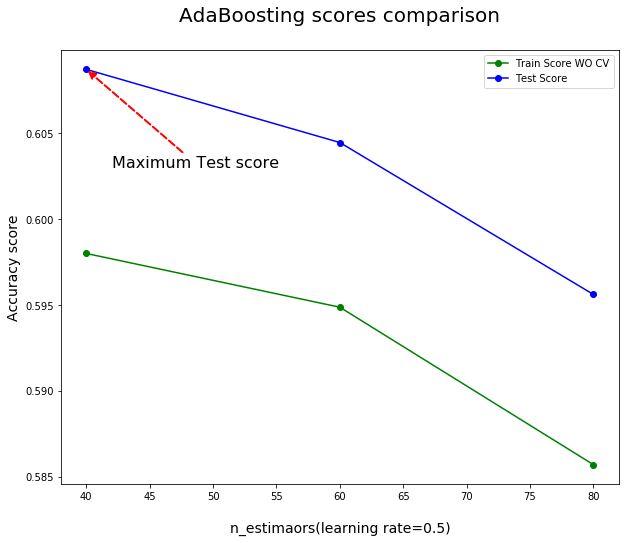

In [37]:
plt.figure(figsize=(10,8))
x_axis = [40,60,80]
plt.plot(x_axis, [0.598,0.59487,0.5857], c = 'g', label = 'Train Score WO CV',marker='o')
plt.plot(x_axis, [0.60872,0.60446,0.59561], c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('AdaBoosting scores comparison\n',fontsize=20)
plt.xlabel('\nn_estimaors(learning rate=0.5)',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
#plt.xticks(np.arange(0, 100,3))
plt.annotate("Maximum Test score",fontsize=16,xy=(40, 0.60872),xytext=(42, 0.603), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.show()

<div class="alert alert-block alert-info">
<b><font size="5">GRADIENT BOOSTING</font></b>
</div> 

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
train_cv_array=[]
train_score_array = []
test_score_array = []

from sklearn.ensemble import GradientBoostingClassifier# decision tree base estimator by default
sgb=GradientBoostingClassifier(learning_rate=1.5,n_estimators=400,subsample=0.8,max_depth=75,random_state=999,max_features='sqrt')
scores= cross_val_score(sgb, x_train, y_train, cv=3)
print('\nFor n_estimator = ',400,' and For maxdepth =',75,'and Learning rate = ',1.5)
print('\nCross validation Testing mean:',scores.mean())
sgb.fit(x_train,y_train)
y_pred=sgb.predict(x_test)
train_score_array.append(sgb.score(x_train, y_train))
test_score_array.append(sgb.score(x_test, y_test))
train_cv_array.append(scores.mean())
print('Training score without CV:',sgb.score(x_train, y_train))
print('Test score -->',sgb.score(x_test, y_test))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For n_estimator =  400  and For maxdepth = 75 and Learning rate =  1.5

Cross validation Testing mean: 0.8373005348742577


<div class="alert alert-block alert-info">
<b><font size="5">PRINCIPAL COMPONENT ANALYSIS</font></b>
</div> 

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(random_state=42)
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

In [42]:
x_train_sc.shape

(42182, 52)

In [40]:
pca.explained_variance_ratio_

array([2.13221413e-01, 1.83143559e-01, 6.08389972e-02, 5.39551030e-02,
       4.03103887e-02, 3.53228665e-02, 3.05698289e-02, 2.88786444e-02,
       2.81904066e-02, 2.61326026e-02, 2.50673250e-02, 2.36433999e-02,
       2.05352598e-02, 1.95422828e-02, 1.79604283e-02, 1.68144300e-02,
       1.60908879e-02, 1.39755865e-02, 1.35436838e-02, 1.31641142e-02,
       1.19259881e-02, 1.12332947e-02, 1.08364328e-02, 1.03504266e-02,
       9.55373567e-03, 8.45063520e-03, 7.01570281e-03, 6.42752565e-03,
       5.60990876e-03, 4.93207594e-03, 4.63872040e-03, 4.20069615e-03,
       3.45443233e-03, 3.22143646e-03, 2.83306860e-03, 2.01481394e-03,
       1.92848668e-03, 1.79571149e-03, 1.62396247e-03, 1.48403395e-03,
       1.41989951e-03, 1.04200650e-03, 9.56347318e-04, 5.52771894e-04,
       4.65447844e-04, 3.40033407e-04, 3.22501805e-04, 2.39476320e-04,
       1.39562910e-04, 6.40206117e-05, 2.56348178e-05, 1.00367197e-31])

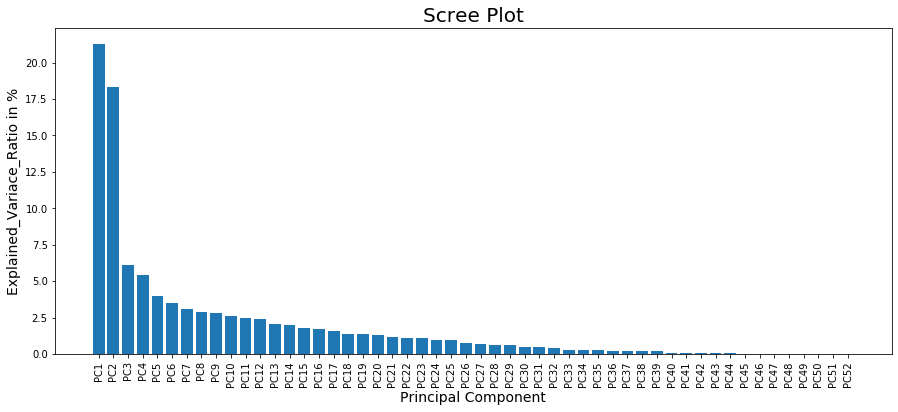

In [51]:
plt.figure(figsize=(15,6))
plt.bar(x=range(1,len(pca.explained_variance_ratio_)+1),height=np.round(pca.explained_variance_ratio_*100,decimals=1),
        tick_label=['PC'+str(x) for x in range (1,len(pca.explained_variance_ratio_)+1)])
plt.ylabel('Explained_Variace_Ratio in %',fontsize=14)
plt.xlabel('Principal Component',fontsize=14)
plt.title('Scree Plot',fontsize=20)
plt.xticks(rotation=90)
plt.show()
         

<div class="alert alert-block alert-success">
From above we can see that the first 10 components explains the most hence we will take that 10 components alone

In [53]:
pca.components_.shape # indicates the loading scores of eac principal components

(52, 52)

Now we will take a look into the first principal component loading scores

In [60]:
loading_scores=pd.Series(pca.components_[0])
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
top_10_loading_scores=sorted_loading_scores[:10].index.values
print('\nThe top 10 loading score elements of first principal component :\n')
print(loading_scores[top_10_loading_scores])


The top 10 loading score elements of first principal component :

11   -0.693584
12    0.567661
14    0.266847
0    -0.195407
9     0.118852
5    -0.094556
48    0.082178
37   -0.081030
2     0.076530
7    -0.072765
dtype: float64


so the loading scores of a principal component is shown above, Now we will select only the first 10 Principal components

In [61]:
pca = PCA(n_components=10,random_state=42)
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

In [65]:
print('\nThe total explained ratio by the first 10 PCA is ',pca.explained_variance_ratio_.sum(),'\n')


The total explained ratio by the first 10 PCA is  0.7005222515176994 



Hereafter we will use this dataset for training and testing the model

### 1). K Neighbors Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [67]:
train_cv_array=[]
train_score_array = []
test_score_array = []
for k in [1,2,3,5,8]:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, x_train_pca, y_train, cv=5)
    print('\nFor k =',k)
    print('\nCross validation Training score mean:',scores.mean())
    knn.fit(x_train_pca,y_train)
    y_pred=knn.predict(x_test_pca)
    train_score_array.append(knn.score(x_train_pca,y_train).round(5))
    test_score_array.append(knn.score(x_test_pca,y_test).round(5))
    train_cv_array.append(scores.mean())
    print('Training score without CV:',knn.score(x_train_pca,y_train).round(5))
    print('Test score -->',knn.score(x_test_pca,y_test).round(5))
    print('\nThe Confusion Matrix is plotted below:')
    display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
    print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
    print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
          f1_score(y_test, y_pred, average='micro').round(2) )
    print('--------------------------------------------------------------------------')
    


For k = 1

Cross validation Training score mean: 0.7809262002470146
Training score without CV: 1.0
Test score --> 0.79213

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2255,568,5,0,95,18,195
2,616,1588,49,0,255,64,44
3,3,46,2646,138,41,530,0
4,0,2,110,541,0,66,0
5,63,117,41,0,2090,39,0
6,6,35,402,45,30,2502,0
7,119,14,0,0,1,1,2699



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.74      0.72      0.73      3136
          2       0.67      0.61      0.64      2616
          3       0.81      0.78      0.79      3404
          4       0.75      0.75      0.75       719
          5       0.83      0.89      0.86      2350
          6       0.78      0.83      0.80      3020
          7       0.92      0.95      0.94      2834

avg / total       0.79      0.79      0.79     18079

   micro avg	   0.79      0.79      0.79
--------------------------------------------------------------------------

For k = 2

Cross validation Training score mean: 0.7569570370559885
Training score without CV: 0.90811
Test score --> 0.76962

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2614,319,5,0,53,16,129
2,1005,1334,48,0,170,41,18
3,9,72,2926,94,22,281,0
4,0,4,191,496,0,28,0
5,126,251,65,0,1895,13,0
6,11,80,740,76,49,2064,0
7,231,17,0,0,1,0,2585



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.65      0.83      0.73      3136
          2       0.64      0.51      0.57      2616
          3       0.74      0.86      0.79      3404
          4       0.74      0.69      0.72       719
          5       0.87      0.81      0.83      2350
          6       0.84      0.68      0.76      3020
          7       0.95      0.91      0.93      2834

avg / total       0.78      0.77      0.77     18079

   micro avg	   0.77      0.77      0.77
--------------------------------------------------------------------------

For k = 3

Cross validation Training score mean: 0.7755199148077496
Training score without CV: 0.88898
Test score --> 0.78782

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2268,519,4,0,95,23,227
2,668,1531,58,0,250,70,39
3,8,47,2635,130,40,544,0
4,0,4,115,543,0,57,0
5,87,108,45,0,2072,37,1
6,7,49,403,45,24,2492,0
7,117,14,0,0,1,0,2702



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.72      0.72      0.72      3136
          2       0.67      0.59      0.63      2616
          3       0.81      0.77      0.79      3404
          4       0.76      0.76      0.76       719
          5       0.83      0.88      0.86      2350
          6       0.77      0.83      0.80      3020
          7       0.91      0.95      0.93      2834

avg / total       0.78      0.79      0.79     18079

   micro avg	   0.79      0.79      0.79
--------------------------------------------------------------------------

For k = 5

Cross validation Training score mean: 0.770707425897468
Training score without CV: 0.85356
Test score --> 0.78345

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2243,517,7,0,101,24,244
2,661,1492,70,0,274,77,42
3,1,33,2615,149,42,564,0
4,0,1,120,552,0,46,0
5,54,112,55,0,2092,37,0
6,2,30,403,59,42,2484,0
7,125,20,0,0,3,0,2686



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.73      0.72      0.72      3136
          2       0.68      0.57      0.62      2616
          3       0.80      0.77      0.78      3404
          4       0.73      0.77      0.75       719
          5       0.82      0.89      0.85      2350
          6       0.77      0.82      0.79      3020
          7       0.90      0.95      0.93      2834

avg / total       0.78      0.78      0.78     18079

   micro avg	   0.78      0.78      0.78
--------------------------------------------------------------------------

For k = 8

Cross validation Training score mean: 0.7616038427948182
Training score without CV: 0.82685
Test score --> 0.77936

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2326,426,7,0,112,24,241
2,749,1394,73,0,277,81,42
3,0,20,2714,133,48,489,0
4,0,1,148,523,0,47,0
5,46,107,58,0,2098,40,1
6,2,33,482,61,51,2391,0
7,167,19,0,0,4,0,2644



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.71      0.74      0.72      3136
          2       0.70      0.53      0.60      2616
          3       0.78      0.80      0.79      3404
          4       0.73      0.73      0.73       719
          5       0.81      0.89      0.85      2350
          6       0.78      0.79      0.78      3020
          7       0.90      0.93      0.92      2834

avg / total       0.78      0.78      0.78     18079

   micro avg	   0.78      0.78      0.78
--------------------------------------------------------------------------


<div class="alert alert-block alert-success">
    From above we can see that the best accuracy score is when K=1 which is of 0.79213

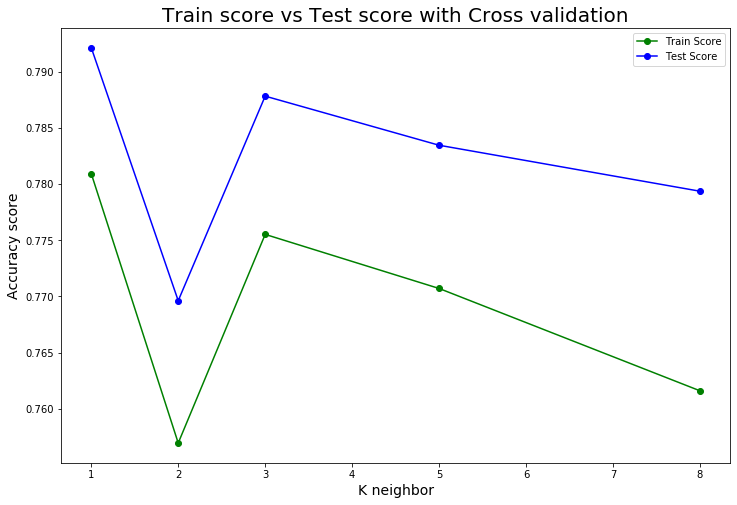

In [70]:
plt.figure(figsize=(12,8))
x_axis = [1,2,3,5,8]
plt.plot(x_axis, train_cv_array, c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('Train score vs Test score with Cross validation',fontsize=20)
plt.xlabel('K neighbor',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
#plt.xticks(np.arange(0, 13, 1))
plt.show()

### 2). Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression # using lbfgs as solver
param={'C':[0.01, 0.1, 1, 10,20,30,40,50]}
log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",n_jobs=-1,random_state=42,penalty='l2')
log_reg_gcv=GridSearchCV(estimator=log_reg,param_grid=param,return_train_score=True,cv=5,n_jobs=-1)
log_reg_gcv.fit(x_train_pca,y_train)
print("\nBest parameters: {}".format(log_reg_gcv.best_params_))
print("\nBest cross-validation score: {:.2f}\n\n".format(log_reg_gcv.best_score_))
results = pd.DataFrame(log_reg_gcv.cv_results_)
print('GridSearchCV Results table below:\n')
display(results.head(30))


Best parameters: {'C': 10}

Best cross-validation score: 0.60


GridSearchCV Results table below:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.126291,0.920412,0.012003,0.012406,0.01,{'C': 0.01},0.502844,0.506695,0.515055,0.501779,...,0.506733,0.004674,8,0.508506,0.505320,0.505304,0.509275,0.506682,0.507017,0.001627
1,11.631827,0.770626,0.019206,0.008909,0.1,{'C': 0.1},0.538033,0.550065,0.549550,0.541499,...,0.545422,0.004797,7,0.548812,0.543846,0.545339,0.544536,0.544490,0.545405,0.001768
2,11.403491,1.048567,0.012808,0.007762,1,{'C': 1},0.597156,0.601849,0.600403,0.591416,...,0.598857,0.004261,6,0.601387,0.599769,0.599419,0.600569,0.597173,0.599663,0.001419
3,9.827208,0.149819,0.013603,0.005987,10,{'C': 10},0.600118,0.605996,0.604789,0.596988,...,0.603528,0.004488,1,0.606070,0.604422,0.603153,0.605695,0.601470,0.604162,0.001693
4,10.217216,0.219660,0.017602,0.009668,20,{'C': 20},0.600592,0.604811,0.605382,0.595921,...,0.603219,0.004592,4,0.604825,0.602851,0.603123,0.605399,0.600551,0.603350,0.001703
5,11.072900,0.706744,0.010402,0.003200,30,{'C': 30},0.599645,0.605403,0.605026,0.596514,...,0.603314,0.004722,2,0.606247,0.604422,0.602501,0.605843,0.601233,0.604049,0.001925
6,9.872584,0.073674,0.012805,0.002993,40,{'C': 40},0.598815,0.604219,0.605737,0.596988,...,0.603267,0.004892,3,0.605269,0.603444,0.603034,0.605606,0.601381,0.603747,0.001547
7,8.952762,0.853893,0.007202,0.002995,50,{'C': 50},0.598341,0.605048,0.603959,0.597818,...,0.602959,0.004418,5,0.605536,0.603503,0.601731,0.606258,0.600699,0.603545,0.002132


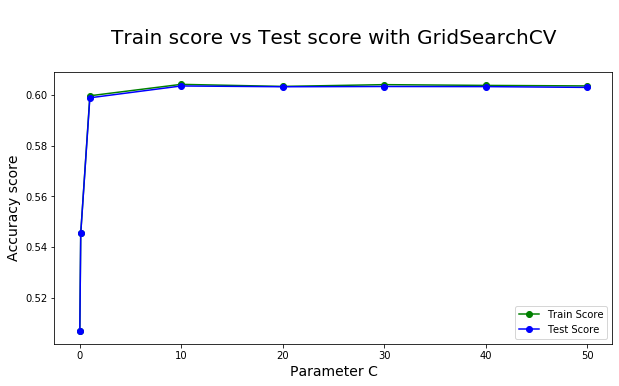

In [72]:
plt.figure(figsize=(10,5))
x_axis = results.param_C
plt.plot(x_axis, results.mean_train_score , c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, results.mean_test_score, c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('\nTrain score vs Test score with GridSearchCV\n',fontsize=20)
plt.xlabel('Parameter C',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

Training the model with the best parameter

In [73]:
log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",n_jobs=-1,random_state=42,penalty='l2',C=10)
scores = cross_val_score(log_reg, x_train_pca, y_train, cv=5)
print('\nFor C =',10)
print('\nThe cross validation scores for 5 folds is: ',scores)
print('\nCross validation Test score mean:',scores.mean())
log_reg.fit(x_train_pca,y_train)
y_pred=log_reg.predict(x_test_pca)
print('Training score without CV       :',log_reg.score(x_train_pca,y_train).round(5))
print('Test score without CV           :',log_reg.score(x_test_pca,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For C = 10

The cross validation scores for 5 folds is:  [0.60011848 0.60599597 0.604789   0.59698838 0.60974742]

Cross validation Test score mean: 0.6035278510473295
Training score without CV       : 0.60298
Test score without CV           : 0.60767

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1900,563,4,0,234,11,424
2,1013,925,46,0,463,120,49
3,0,25,2225,136,133,885,0
4,0,0,269,335,0,115,0
5,122,416,194,0,1534,84,0
6,0,66,811,98,246,1799,0
7,463,92,2,0,9,0,2268



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.54      0.61      0.57      3136
          2       0.44      0.35      0.39      2616
          3       0.63      0.65      0.64      3404
          4       0.59      0.47      0.52       719
          5       0.59      0.65      0.62      2350
          6       0.60      0.60      0.60      3020
          7       0.83      0.80      0.81      2834

avg / total       0.61      0.61      0.60     18079

   micro avg	   0.61      0.61      0.61
--------------------------------------------------------------------------


### 3). Linear SVC

In [75]:
from sklearn.svm import LinearSVC
param={'C':[10,20,25,30,35,40,45,50], 'penalty':['l2','l1']}
linsvc = LinearSVC(random_state=42,dual=False)  # default multi_class is ovr
linsvc_gcv=GridSearchCV(estimator=linsvc,param_grid=param,return_train_score=True,cv=3,n_jobs=-1)
linsvc_gcv.fit(x_train_pca,y_train)
print("\nBest parameters: {}".format(linsvc_gcv.best_params_))
print("\nBest cross-validation score: {:.2f}\n\n".format(linsvc_gcv.best_score_))
results = pd.DataFrame(linsvc_gcv.cv_results_)
print('GridSearchCV Results table below:\n')
display(results.head(30))


Best parameters: {'C': 25, 'penalty': 'l2'}

Best cross-validation score: 0.54


GridSearchCV Results table below:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.957260,0.542885,0.029337,0.001883,10,l2,"{'C': 10, 'penalty': 'l2'}",0.531361,0.542455,0.535994,0.536603,0.004550,8,0.538976,0.537055,0.535912,0.537315,0.001264
1,33.592193,0.187966,0.036010,0.018186,10,l1,"{'C': 10, 'penalty': 'l1'}",0.530437,0.541957,0.534998,0.535797,0.004737,9,0.538442,0.535917,0.534775,0.536378,0.001532
2,5.396510,0.232159,0.042681,0.014732,20,l2,"{'C': 20, 'penalty': 'l2'}",0.531574,0.542526,0.535994,0.536698,0.004499,2,0.538976,0.537198,0.535841,0.537338,0.001284
3,39.019775,0.126302,0.020003,0.005661,20,l1,"{'C': 20, 'penalty': 'l1'}",0.530294,0.541886,0.534998,0.535726,0.004760,16,0.538478,0.535953,0.534810,0.536414,0.001532
4,4.794873,0.361850,0.029344,0.013201,25,l2,"{'C': 25, 'penalty': 'l2'}",0.531574,0.542597,0.535994,0.536722,0.004530,1,0.539011,0.537304,0.535877,0.537398,0.001281
5,35.564845,2.418754,0.028011,0.009799,25,l1,"{'C': 25, 'penalty': 'l1'}",0.530294,0.541957,0.534998,0.535750,0.004791,10,0.538514,0.535917,0.534846,0.536426,0.001540
6,5.133603,0.309403,0.026673,0.010502,30,l2,"{'C': 30, 'penalty': 'l2'}",0.531503,0.542526,0.535994,0.536674,0.004526,3,0.538940,0.537340,0.535912,0.537398,0.001237
7,42.541046,0.263276,0.033345,0.017993,30,l1,"{'C': 30, 'penalty': 'l1'}",0.530294,0.541957,0.534998,0.535750,0.004791,10,0.538549,0.535917,0.534846,0.536437,0.001556
8,4.785776,0.491577,0.041347,0.020746,35,l2,"{'C': 35, 'penalty': 'l2'}",0.531503,0.542526,0.535923,0.536651,0.004530,6,0.538940,0.537376,0.535912,0.537409,0.001236
9,35.845374,1.269109,0.032009,0.003266,35,l1,"{'C': 35, 'penalty': 'l1'}",0.530294,0.541957,0.534998,0.535750,0.004791,10,0.538549,0.535917,0.534846,0.536437,0.001556


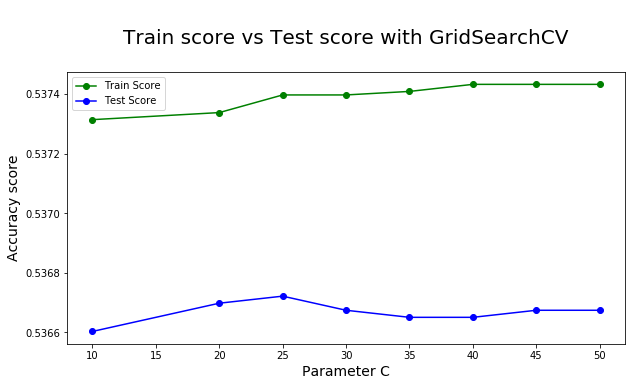

In [76]:
plt.figure(figsize=(10,5))
x_axis = results.param_C[results.param_penalty=='l2']
plt.plot(x_axis, results.mean_train_score[results.param_penalty=='l2'] , c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, results.mean_test_score[results.param_penalty=='l2'], c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('\nTrain score vs Test score with GridSearchCV\n',fontsize=20)
plt.xlabel('Parameter C',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

Training the model with the best parameter

In [77]:
linsvc = LinearSVC(random_state=42,dual=False,C=25,penalty='l2')
scores = cross_val_score(linsvc, x_train_pca, y_train, cv=5)
print('\nFor C =',25)
print('\nThe cross validation scores for 5 folds is: ',scores)
print('\nCross validation Test score mean:',scores.mean())
linsvc.fit(x_train_pca,y_train)
y_pred=linsvc.predict(x_test_pca)
print('Training score without CV       :',linsvc.score(x_train_pca,y_train).round(5))
print('Test score without CV           :',linsvc.score(x_test_pca,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    


For C = 25

The cross validation scores for 5 folds is:  [0.52950237 0.54141486 0.54338549 0.52549206 0.54025851]

Cross validation Test score mean: 0.5360106568416131
Training score without CV       : 0.5372
Test score without CV           : 0.53786

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1565,400,4,0,358,21,788
2,1105,554,49,0,630,114,164
3,5,9,2178,52,111,1049,0
4,0,0,483,135,0,101,0
5,381,371,214,0,1244,123,17
6,9,49,805,43,424,1690,0
7,342,90,9,0,35,0,2358



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.46      0.50      0.48      3136
          2       0.38      0.21      0.27      2616
          3       0.58      0.64      0.61      3404
          4       0.59      0.19      0.28       719
          5       0.44      0.53      0.48      2350
          6       0.55      0.56      0.55      3020
          7       0.71      0.83      0.77      2834

avg / total       0.53      0.54      0.52     18079

   micro avg	   0.54      0.54      0.54
--------------------------------------------------------------------------


### 4).SVC with Linear Kernel

In [78]:
from sklearn.svm import SVC
param={'C':[0.1,1,10,15,20,25,30], 'decision_function_shape':['ovr','ovo']} #USING BOTH OVR AND OVO METHODS
svclinkl = SVC(kernel='linear', random_state=42)
svclinkl_gcv=GridSearchCV(estimator=svclinkl,param_grid=param,return_train_score=True,cv=3,n_jobs=-1)
svclinkl_gcv.fit(x_train_pca,y_train)
print("\nBest parameters: {}".format(svclinkl_gcv.best_params_))
print("\nBest cross-validation score: {:.2f}\n\n".format(svclinkl_gcv.best_score_))
results = pd.DataFrame(svclinkl_gcv.cv_results_)
print('GridSearchCV Results table below:\n')
display(results.head(10))


Best parameters: {'C': 25, 'decision_function_shape': 'ovr'}

Best cross-validation score: 0.60


GridSearchCV Results table below:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,116.777321,0.769259,33.781130,1.267915,0.1,ovr,"{'C': 0.1, 'decision_function_shape': 'ovr'}",0.557246,0.561869,0.559183,0.559433,0.001895,13,0.559780,0.558677,0.562758,0.560405,0.001724
1,118.006174,1.433022,36.799340,1.028216,0.1,ovo,"{'C': 0.1, 'decision_function_shape': 'ovo'}",0.557246,0.561869,0.559183,0.559433,0.001895,13,0.559780,0.558677,0.562758,0.560405,0.001724
2,104.734669,7.922246,32.850056,3.686871,1,ovr,"{'C': 1, 'decision_function_shape': 'ovr'}",0.589034,0.591523,0.588064,0.589541,0.001457,11,0.591003,0.589687,0.591488,0.590726,0.000761
3,94.966840,1.889110,28.718495,0.588624,1,ovo,"{'C': 1, 'decision_function_shape': 'ovo'}",0.589034,0.591523,0.588064,0.589541,0.001457,11,0.591003,0.589687,0.591488,0.590726,0.000761
4,136.609861,2.577482,26.245683,0.684128,10,ovr,"{'C': 10, 'decision_function_shape': 'ovr'}",0.596999,0.600341,0.595035,0.597459,0.002191,9,0.600427,0.598435,0.597426,0.598763,0.001247
5,124.514300,7.332104,25.184408,0.613230,10,ovo,"{'C': 10, 'decision_function_shape': 'ovo'}",0.596999,0.600341,0.595035,0.597459,0.002191,9,0.600427,0.598435,0.597426,0.598763,0.001247
6,124.866117,1.564742,25.254429,0.346820,15,ovr,"{'C': 15, 'decision_function_shape': 'ovr'}",0.597283,0.601124,0.595888,0.598099,0.002214,7,0.600605,0.598578,0.597603,0.598929,0.001250
7,123.915546,0.834394,26.431393,0.657686,15,ovo,"{'C': 15, 'decision_function_shape': 'ovo'}",0.597283,0.601124,0.595888,0.598099,0.002214,7,0.600605,0.598578,0.597603,0.598929,0.001250
8,129.014178,0.539439,26.737805,2.303568,20,ovr,"{'C': 20, 'decision_function_shape': 'ovr'}",0.597639,0.601550,0.595817,0.598336,0.002392,5,0.601067,0.599182,0.597639,0.599296,0.001402
9,128.403353,0.312635,26.930518,2.147904,20,ovo,"{'C': 20, 'decision_function_shape': 'ovo'}",0.597639,0.601550,0.595817,0.598336,0.002392,5,0.601067,0.599182,0.597639,0.599296,0.001402


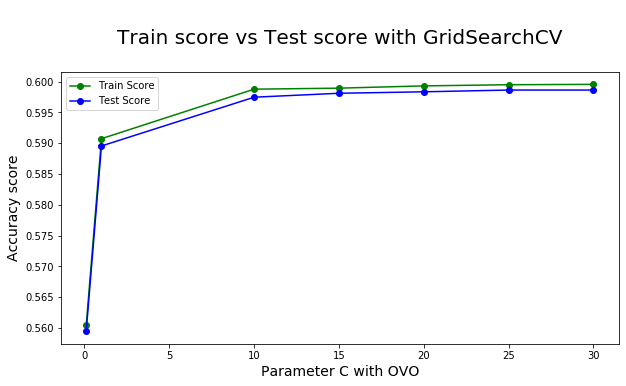

In [79]:
plt.figure(figsize=(10,5))
x_axis = results.param_C[results.param_decision_function_shape=='ovr']
plt.plot(x_axis, results.mean_train_score[results.param_decision_function_shape=='ovr'] , c = 'g', label = 'Train Score',marker='o')
plt.plot(x_axis, results.mean_test_score[results.param_decision_function_shape=='ovr'], c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('\nTrain score vs Test score with GridSearchCV\n',fontsize=20)
plt.xlabel('Parameter C with OVO',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
plt.show()

Training the model with the best parameter

In [81]:
y_pred=svclinkl_gcv.predict(x_test_pca)
print('Training score without CV       :',svclinkl_gcv.score(x_train_pca,y_train).round(5))
print('Test score without CV           :',svclinkl_gcv.score(x_test_pca,y_test).round(5))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')
    

Training score without CV       : 0.59973
Test score without CV           : 0.6075

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1971,533,4,0,229,16,383
2,1041,907,47,0,449,139,33
3,0,27,2028,138,94,1117,0
4,0,0,260,388,0,71,0
5,162,404,209,0,1488,87,0
6,0,67,671,124,193,1965,0
7,506,89,1,0,2,0,2236



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.54      0.63      0.58      3136
          2       0.45      0.35      0.39      2616
          3       0.63      0.60      0.61      3404
          4       0.60      0.54      0.57       719
          5       0.61      0.63      0.62      2350
          6       0.58      0.65      0.61      3020
          7       0.84      0.79      0.82      2834

avg / total       0.61      0.61      0.61     18079

   micro avg	   0.61      0.61      0.61
--------------------------------------------------------------------------


### 5). SVC with RBF kernel

In [82]:
from sklearn.svm import SVC
train_cv_array=[]
train_score_array = []
test_score_array = []
for i in [0.1,1,10,15,20]:
    for ga in  [0.001,0.1,1,10]:
        svcrbf = SVC(kernel='rbf', random_state=42,C=i, gamma=ga)
        scores = cross_val_score(svcrbf, x_train_pca, y_train, cv=3)
        print('\nFor C =',i,'and gamma = ',ga)
        print('\nCross validation Training score mean:',scores.mean())
        svcrbf.fit(x_train_pca,y_train)
        y_pred=svcrbf.predict(x_test_pca)
        train_score_array.append(svcrbf.score(x_train_pca,y_train).round(5))
        test_score_array.append(svcrbf.score(x_test_pca,y_test).round(5))
        train_cv_array.append(scores.mean())
        print('Training score without CV:',svcrbf.score(x_train_pca,y_train).round(5))
        print('Test score -->',svcrbf.score(x_test_pca,y_test).round(5))
        print('\nThe Confusion Matrix is plotted below:')
        display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
        print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
        print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
              f1_score(y_test, y_pred, average='micro').round(2) )
        print('--------------------------------------------------------------------------')
    


For C = 0.1 and gamma =  0.001

Cross validation Training score mean: 0.35572042440317947
Training score without CV: 0.33284
Test score --> 0.33027

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,3114,0,20,0,0,0,2
2,2486,0,130,0,0,0,0
3,603,0,2801,0,0,0,0
4,0,0,719,0,0,0,0
5,2189,0,161,0,0,0,0
6,618,0,2402,0,0,0,0
7,2778,0,0,0,0,0,56


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.26      0.99      0.42      3136
          2       0.00      0.00      0.00      2616
          3       0.45      0.82      0.58      3404
          4       0.00      0.00      0.00       719
          5       0.00      0.00      0.00      2350
          6       0.00      0.00      0.00      3020
          7       0.97      0.02      0.04      2834

avg / total       0.28      0.33      0.19     18079

   micro avg	   0.33      0.33      0.33
--------------------------------------------------------------------------

For C = 0.1 and gamma =  0.1

Cross validation Training score mean: 0.5279970591658669
Training score without CV: 0.54201
Test score --> 0.54588

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1777,657,4,0,313,17,368
2,940,943,37,0,553,108,35
3,2,3,2098,0,289,1012,0
4,0,0,659,0,0,60,0
5,311,426,209,0,1354,50,0
6,7,42,907,0,504,1560,0
7,522,118,9,0,48,0,2137


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.50      0.57      0.53      3136
          2       0.43      0.36      0.39      2616
          3       0.53      0.62      0.57      3404
          4       0.00      0.00      0.00       719
          5       0.44      0.58      0.50      2350
          6       0.56      0.52      0.54      3020
          7       0.84      0.75      0.80      2834

avg / total       0.53      0.55      0.54     18079

   micro avg	   0.55      0.55      0.55
--------------------------------------------------------------------------

For C = 0.1 and gamma =  1

Cross validation Training score mean: 0.5921960801778751
Training score without CV: 0.61052
Test score --> 0.61475

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1990,681,4,0,167,48,246
2,837,1163,49,0,384,170,13
3,1,4,2473,27,123,776,0
4,0,0,476,126,0,117,0
5,249,345,209,0,1467,80,0
6,10,57,943,23,162,1825,0
7,613,113,9,0,29,0,2070



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.54      0.63      0.58      3136
          2       0.49      0.44      0.47      2616
          3       0.59      0.73      0.65      3404
          4       0.72      0.18      0.28       719
          5       0.63      0.62      0.63      2350
          6       0.61      0.60      0.60      3020
          7       0.89      0.73      0.80      2834

avg / total       0.63      0.61      0.61     18079

   micro avg	   0.61      0.61      0.61
--------------------------------------------------------------------------

For C = 0.1 and gamma =  10

Cross validation Training score mean: 0.6553746253516487
Training score without CV: 0.67083
Test score --> 0.67531

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1997,654,5,0,135,40,305
2,787,1317,55,0,283,146,28
3,0,6,2433,146,113,706,0
4,0,0,203,420,0,96,0
5,141,367,102,0,1663,77,0
6,9,85,770,46,86,2024,0
7,421,38,0,0,20,0,2355



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.60      0.64      0.62      3136
          2       0.53      0.50      0.52      2616
          3       0.68      0.71      0.70      3404
          4       0.69      0.58      0.63       719
          5       0.72      0.71      0.72      2350
          6       0.66      0.67      0.66      3020
          7       0.88      0.83      0.85      2834

avg / total       0.68      0.68      0.68     18079

   micro avg	   0.68      0.68      0.68
--------------------------------------------------------------------------

For C = 1 and gamma =  0.001

Cross validation Training score mean: 0.49807998568918516
Training score without CV: 0.49929
Test score --> 0.49721

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2243,0,4,0,397,17,475
2,1802,0,29,0,606,109,70
3,12,0,1707,0,597,1088,0
4,0,0,659,0,0,60,0
5,851,0,148,0,1301,50,0
6,58,0,795,0,599,1568,0
7,599,0,9,0,56,0,2170



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.40      0.72      0.52      3136
          2       0.00      0.00      0.00      2616
          3       0.51      0.50      0.51      3404
          4       0.00      0.00      0.00       719
          5       0.37      0.55      0.44      2350
          6       0.54      0.52      0.53      3020
          7       0.80      0.77      0.78      2834

avg / total       0.43      0.50      0.45     18079

   micro avg	  

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.5      0.5      0.5
--------------------------------------------------------------------------

For C = 1 and gamma =  0.1

Cross validation Training score mean: 0.5910815550589911
Training score without CV: 0.59905
Test score --> 0.60573

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1984,627,4,0,195,21,305
2,941,1043,49,0,447,121,15
3,0,13,2566,0,123,702,0
4,0,0,597,0,0,122,0
5,185,359,209,0,1531,66,0
6,0,64,1040,0,214,1702,0
7,581,109,9,0,10,0,2125


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.54      0.63      0.58      3136
          2       0.47      0.40      0.43      2616
          3       0.57      0.75      0.65      3404
          4       0.00      0.00      0.00       719
          5       0.61      0.65      0.63      2350
          6       0.62      0.56      0.59      3020
          7       0.87      0.75      0.81      2834

avg / total       0.59      0.61      0.59     18079

   micro avg	   0.61      0.61      0.61
--------------------------------------------------------------------------

For C = 1 and gamma =  1

Cross validation Training score mean: 0.6554935595161876
Training score without CV: 0.66768
Test score --> 0.67471

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2047,622,4,0,126,38,299
2,752,1326,50,0,314,149,25
3,0,13,2485,141,113,652,0
4,0,0,197,426,0,96,0
5,116,376,115,0,1662,81,0
6,3,84,822,51,86,1974,0
7,504,34,0,0,18,0,2278



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.60      0.65      0.62      3136
          2       0.54      0.51      0.52      2616
          3       0.68      0.73      0.70      3404
          4       0.69      0.59      0.64       719
          5       0.72      0.71      0.71      2350
          6       0.66      0.65      0.66      3020
          7       0.88      0.80      0.84      2834

avg / total       0.68      0.67      0.68     18079

   micro avg	   0.67      0.67      0.67
--------------------------------------------------------------------------

For C = 1 and gamma =  10

Cross validation Training score mean: 0.718695492231603
Training score without CV: 0.74032
Test score --> 0.73583

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2183,522,5,0,110,24,292
2,671,1420,65,0,309,120,31
3,0,6,2605,128,69,596,0
4,0,0,155,487,0,77,0
5,52,210,64,0,1947,77,0
6,4,65,738,43,46,2124,0
7,278,18,0,0,1,0,2537



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.68      0.70      0.69      3136
          2       0.63      0.54      0.58      2616
          3       0.72      0.77      0.74      3404
          4       0.74      0.68      0.71       719
          5       0.78      0.83      0.81      2350
          6       0.70      0.70      0.70      3020
          7       0.89      0.90      0.89      2834

avg / total       0.73      0.74      0.73     18079

   micro avg	   0.74      0.74      0.74
--------------------------------------------------------------------------

For C = 10 and gamma =  0.001

Cross validation Training score mean: 0.5252949364599782
Training score without CV: 0.53959
Test score --> 0.54312

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1822,563,4,0,301,17,429
2,999,885,37,0,535,108,52
3,1,7,2007,0,301,1088,0
4,0,0,659,0,0,60,0
5,288,475,206,0,1331,50,0
6,1,53,916,0,482,1568,0
7,467,110,9,0,42,0,2206



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.51      0.58      0.54      3136
          2       0.42      0.34      0.38      2616
          3       0.52      0.59      0.55      3404
          4       0.00      0.00      0.00       719
          5       0.44      0.57      0.50      2350
          6       0.54      0.52      0.53      3020
          7       0.82      0.78      0.80      2834

avg / total       0.53      0.54      0.53     18079

   micro avg	   0.54     

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.54      0.54
--------------------------------------------------------------------------

For C = 10 and gamma =  0.1

Cross validation Training score mean: 0.6371441968305757
Training score without CV: 0.64639
Test score --> 0.65092

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1994,640,4,0,156,38,304
2,781,1236,53,0,387,137,22
3,0,22,2522,141,104,615,0
4,0,0,247,374,0,98,0
5,121,358,171,0,1608,92,0
6,2,70,933,71,124,1820,0
7,540,70,7,0,3,0,2214



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.58      0.64      0.61      3136
          2       0.52      0.47      0.49      2616
          3       0.64      0.74      0.69      3404
          4       0.64      0.52      0.57       719
          5       0.68      0.68      0.68      2350
          6       0.65      0.60      0.63      3020
          7       0.87      0.78      0.82      2834

avg / total       0.65      0.65      0.65     18079

   micro avg	   0.65      0.65      0.65
--------------------------------------------------------------------------

For C = 10 and gamma =  1

Cross validation Training score mean: 0.7017689756446289
Training score without CV: 0.71438
Test score --> 0.71912

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2176,482,4,0,135,22,317
2,701,1354,60,0,342,127,32
3,0,8,2547,131,69,649,0
4,0,0,159,489,0,71,0
5,36,293,70,0,1871,80,0
6,1,59,776,38,51,2095,0
7,355,8,1,0,1,0,2469



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.67      0.69      0.68      3136
          2       0.61      0.52      0.56      2616
          3       0.70      0.75      0.73      3404
          4       0.74      0.68      0.71       719
          5       0.76      0.80      0.78      2350
          6       0.69      0.69      0.69      3020
          7       0.88      0.87      0.87      2834

avg / total       0.72      0.72      0.72     18079

   micro avg	   0.72      0.72      0.72
--------------------------------------------------------------------------

For C = 10 and gamma =  10

Cross validation Training score mean: 0.7745013973406945
Training score without CV: 0.80428
Test score --> 0.78389

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2330,476,7,0,89,9,225
2,572,1543,63,0,308,108,22
3,0,11,2657,127,31,578,0
4,0,0,117,540,0,62,0
5,19,122,72,0,2110,27,0
6,0,30,582,49,31,2328,0
7,167,3,0,0,0,0,2664



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.75      0.74      0.75      3136
          2       0.71      0.59      0.64      2616
          3       0.76      0.78      0.77      3404
          4       0.75      0.75      0.75       719
          5       0.82      0.90      0.86      2350
          6       0.75      0.77      0.76      3020
          7       0.92      0.94      0.93      2834

avg / total       0.78      0.78      0.78     18079

   micro avg	   0.78      0.78      0.78
--------------------------------------------------------------------------

For C = 15 and gamma =  0.001

Cross validation Training score mean: 0.5401590765612473
Training score without CV: 0.54914
Test score --> 0.55352

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1902,531,4,0,275,17,407
2,1058,863,44,0,503,106,42
3,1,7,2114,0,194,1088,0
4,0,0,659,0,0,60,0
5,263,469,215,0,1353,50,0
6,0,57,1033,0,362,1568,0
7,485,103,8,0,31,0,2207



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.51      0.61      0.56      3136
          2       0.43      0.33      0.37      2616
          3       0.52      0.62      0.57      3404
          4       0.00      0.00      0.00       719
          5       0.50      0.58      0.53      2350
          6       0.54      0.52      0.53      3020
          7       0.83      0.78      0.80      2834

avg / total       0.53      0.55      0.54     18079

   micro avg	  

C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 0.55      0.55      0.55
--------------------------------------------------------------------------

For C = 15 and gamma =  0.1

Cross validation Training score mean: 0.6448488691663284
Training score without CV: 0.65341
Test score --> 0.659

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2014,625,5,0,153,33,306
2,766,1264,52,0,373,138,23
3,0,23,2518,139,104,620,0
4,0,0,244,383,0,92,0
5,111,350,125,0,1665,99,0
6,2,72,919,70,117,1840,0
7,547,50,2,0,5,0,2230



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.59      0.64      0.61      3136
          2       0.53      0.48      0.51      2616
          3       0.65      0.74      0.69      3404
          4       0.65      0.53      0.58       719
          5       0.69      0.71      0.70      2350
          6       0.65      0.61      0.63      3020
          7       0.87      0.79      0.83      2834

avg / total       0.66      0.66      0.66     18079

   micro avg	   0.66      0.66      0.66
--------------------------------------------------------------------------

For C = 15 and gamma =  1

Cross validation Training score mean: 0.7103506420094328
Training score without CV: 0.72446
Test score --> 0.72781

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2177,485,3,0,134,20,317
2,676,1366,60,0,350,130,34
3,0,7,2559,124,59,655,0
4,0,0,156,491,0,72,0
5,23,253,72,0,1918,84,0
6,1,45,761,35,43,2135,0
7,314,7,0,0,1,0,2512



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.68      0.69      0.69      3136
          2       0.63      0.52      0.57      2616
          3       0.71      0.75      0.73      3404
          4       0.76      0.68      0.72       719
          5       0.77      0.82      0.79      2350
          6       0.69      0.71      0.70      3020
          7       0.88      0.89      0.88      2834

avg / total       0.73      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------

For C = 15 and gamma =  10

Cross validation Training score mean: 0.7813525913399512
Training score without CV: 0.81435
Test score --> 0.79147

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2355,461,9,0,85,9,217
2,561,1575,58,0,299,100,23
3,0,10,2662,122,31,579,0
4,0,0,107,558,0,54,0
5,16,120,68,0,2121,25,0
6,0,30,552,54,29,2355,0
7,148,3,0,0,0,0,2683



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.76      0.75      0.76      3136
          2       0.72      0.60      0.65      2616
          3       0.77      0.78      0.78      3404
          4       0.76      0.78      0.77       719
          5       0.83      0.90      0.86      2350
          6       0.75      0.78      0.77      3020
          7       0.92      0.95      0.93      2834

avg / total       0.79      0.79      0.79     18079

   micro avg	   0.79      0.79      0.79
--------------------------------------------------------------------------

For C = 20 and gamma =  0.001

Cross validation Training score mean: 0.5472237126510656
Training score without CV: 0.55253
Test score --> 0.55755

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1955,499,4,0,263,17,398
2,1089,836,44,0,505,104,38
3,1,7,2134,0,173,1089,0
4,0,0,659,0,0,60,0
5,264,436,221,0,1379,50,0
6,0,60,1051,0,339,1570,0
7,502,94,5,0,27,0,2206


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.51      0.62      0.56      3136
          2       0.43      0.32      0.37      2616
          3       0.52      0.63      0.57      3404
          4       0.00      0.00      0.00       719
          5       0.51      0.59      0.55      2350
          6       0.54      0.52      0.53      3020
          7       0.83      0.78      0.81      2834

avg / total       0.54      0.56      0.54     18079

   micro avg	   0.56      0.56      0.56
--------------------------------------------------------------------------

For C = 20 and gamma =  0.1

Cross validation Training score mean: 0.6502066160310034
Training score without CV: 0.6582
Test score --> 0.66414

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2029,623,5,0,144,33,302
2,750,1285,52,0,369,135,25
3,0,25,2531,129,103,616,0
4,0,0,237,392,0,90,0
5,104,350,108,0,1688,100,0
6,3,74,922,63,109,1849,0
7,557,41,0,0,3,0,2233



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.59      0.65      0.62      3136
          2       0.54      0.49      0.51      2616
          3       0.66      0.74      0.70      3404
          4       0.67      0.55      0.60       719
          5       0.70      0.72      0.71      2350
          6       0.65      0.61      0.63      3020
          7       0.87      0.79      0.83      2834

avg / total       0.67      0.66      0.66     18079

   micro avg	   0.66      0.66      0.66
--------------------------------------------------------------------------

For C = 20 and gamma =  1

Cross validation Training score mean: 0.7161112919725182
Training score without CV: 0.73095
Test score --> 0.73295

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2207,473,3,0,128,22,303
2,661,1369,65,0,355,129,37
3,0,7,2562,122,59,654,0
4,0,0,151,491,0,77,0
5,20,234,72,0,1939,85,0
6,1,39,751,42,46,2141,0
7,285,6,0,0,1,0,2542



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.70      0.70      0.70      3136
          2       0.64      0.52      0.58      2616
          3       0.71      0.75      0.73      3404
          4       0.75      0.68      0.71       719
          5       0.77      0.83      0.79      2350
          6       0.69      0.71      0.70      3020
          7       0.88      0.90      0.89      2834

avg / total       0.73      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------

For C = 20 and gamma =  10

Cross validation Training score mean: 0.7872792338318249
Training score without CV: 0.82199
Test score --> 0.79678

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2373,460,7,0,76,9,211
2,557,1593,58,0,289,98,21
3,0,10,2684,115,31,564,0
4,0,0,106,565,0,48,0
5,15,114,68,0,2128,25,0
6,0,29,535,53,26,2377,0
7,146,3,0,0,0,0,2685



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.76      3136
          2       0.72      0.61      0.66      2616
          3       0.78      0.79      0.78      3404
          4       0.77      0.79      0.78       719
          5       0.83      0.91      0.87      2350
          6       0.76      0.79      0.77      3020
          7       0.92      0.95      0.93      2834

avg / total       0.79      0.80      0.79     18079

   micro avg	   0.8      0.8      0.8
--------------------------------------------------------------------------


From above we can see that the max scores are when C=20 and gamma =10 (accuracy score of 0.79678)

### 6). Decision Trees

In [83]:
train_cv_array=[]
train_score_array = []
test_score_array = []

from sklearn.tree import DecisionTreeClassifier
for d in [3,5,8,10,12,15,18,20,22,24,26,28,30]:
    dtree = DecisionTreeClassifier(max_depth=d,random_state=999)
    scores = cross_val_score(dtree, x_train_pca, y_train, cv=5)
    print('\nFor maxdepth =',d)
    print('\nCross validation Test mean:',scores.mean())
    dtree.fit(x_train_pca,y_train)
    y_pred=dtree.predict(x_test_pca)
    train_score_array.append(dtree.score(x_train_pca, y_train))
    test_score_array.append(dtree.score(x_test_pca, y_test))
    train_cv_array.append(scores.mean())
    print('Training score without CV:',dtree.score(x_train_pca, y_train))
    print('Test score -->',dtree.score(x_test_pca, y_test))
    print('\nThe Confusion Matrix is plotted below:')
    display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
    print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
    print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
          f1_score(y_test, y_pred, average='micro').round(2) )
    print('--------------------------------------------------------------------------')
    


For maxdepth = 3

Cross validation Test mean: 0.486984500419484
Training score without CV: 0.4871035038642075
Test score --> 0.48636539631616793

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2358,232,18,0,38,42,448
2,1937,288,90,0,57,167,77
3,171,41,1626,0,0,1566,0
4,20,0,550,0,0,149,0
5,1204,248,325,0,432,106,35
6,270,92,546,0,0,2112,0
7,784,58,10,0,5,0,1977


C:\Users\munikrishnan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.35      0.75      0.48      3136
          2       0.30      0.11      0.16      2616
          3       0.51      0.48      0.50      3404
          4       0.00      0.00      0.00       719
          5       0.81      0.18      0.30      2350
          6       0.51      0.70      0.59      3020
          7       0.78      0.70      0.74      2834

avg / total       0.51      0.49      0.45     18079

   micro avg	   0.49      0.49      0.49
--------------------------------------------------------------------------

For maxdepth = 5

Cross validation Test mean: 0.5564696879955708
Training score without CV: 0.5598359489829785
Test score --> 0.5577742131755075

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1456,1005,4,0,208,66,397
2,676,1215,33,0,429,231,32
3,5,8,2145,63,199,984,0
4,0,0,399,168,20,132,0
5,264,522,171,0,1257,135,1
6,38,30,904,5,247,1796,0
7,583,162,9,0,33,0,2047



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.48      0.46      0.47      3136
          2       0.41      0.46      0.44      2616
          3       0.59      0.63      0.61      3404
          4       0.71      0.23      0.35       719
          5       0.53      0.53      0.53      2350
          6       0.54      0.59      0.56      3020
          7       0.83      0.72      0.77      2834

avg / total       0.57      0.56      0.56     18079

   micro avg	   0.56      0.56      0.56
--------------------------------------------------------------------------

For maxdepth = 8

Cross validation Test mean: 0.6387798152495876
Training score without CV: 0.6611113745199374
Test score --> 0.6389180817523094

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1725,885,6,0,207,54,259
2,736,1333,71,0,274,178,24
3,5,2,2498,85,123,687,4
4,0,0,282,288,0,149,0
5,133,424,95,0,1577,118,3
6,38,17,881,35,120,1929,0
7,455,144,0,0,34,0,2201



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.56      0.55      0.55      3136
          2       0.48      0.51      0.49      2616
          3       0.65      0.73      0.69      3404
          4       0.71      0.40      0.51       719
          5       0.68      0.67      0.67      2350
          6       0.62      0.64      0.63      3020
          7       0.88      0.78      0.83      2834

avg / total       0.65      0.64      0.64     18079

   micro avg	   0.64      0.64      0.64
--------------------------------------------------------------------------

For maxdepth = 10

Cross validation Test mean: 0.6737711442126009
Training score without CV: 0.7211606846522213
Test score --> 0.6745395209912053

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,1904,784,20,0,99,16,313
2,762,1373,90,1,242,103,45
3,0,30,2418,115,120,721,0
4,0,0,183,396,0,140,0
5,101,422,103,0,1667,56,1
6,12,80,700,41,119,2068,0
7,375,85,0,0,5,0,2369



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.60      0.61      0.61      3136
          2       0.49      0.52      0.51      2616
          3       0.69      0.71      0.70      3404
          4       0.72      0.55      0.62       719
          5       0.74      0.71      0.72      2350
          6       0.67      0.68      0.68      3020
          7       0.87      0.84      0.85      2834

avg / total       0.68      0.67      0.68     18079

   micro avg	   0.67      0.67      0.67
--------------------------------------------------------------------------

For maxdepth = 12

Cross validation Test mean: 0.7019348501318017
Training score without CV: 0.7886539282158267
Test score --> 0.7060678134852592

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2051,624,14,0,100,25,322
2,814,1320,77,0,248,91,66
3,1,26,2391,129,58,799,0
4,0,0,193,443,0,83,0
5,119,290,107,0,1766,60,8
6,4,62,513,68,86,2287,0
7,261,59,1,0,4,2,2507



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.63      0.65      0.64      3136
          2       0.55      0.50      0.53      2616
          3       0.73      0.70      0.71      3404
          4       0.69      0.62      0.65       719
          5       0.78      0.75      0.77      2350
          6       0.68      0.76      0.72      3020
          7       0.86      0.88      0.87      2834

avg / total       0.70      0.71      0.70     18079

   micro avg	   0.71      0.71      0.71
--------------------------------------------------------------------------

For maxdepth = 15

Cross validation Test mean: 0.7228200082911943
Training score without CV: 0.8817505096960789
Test score --> 0.7309585707174069

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2121,677,3,0,83,21,231
2,767,1397,64,0,247,93,48
3,2,57,2532,132,64,617,0
4,0,1,183,476,0,59,0
5,107,239,69,0,1876,56,3
6,11,35,526,76,55,2317,0
7,284,48,0,0,6,0,2496



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.64      0.68      0.66      3136
          2       0.57      0.53      0.55      2616
          3       0.75      0.74      0.75      3404
          4       0.70      0.66      0.68       719
          5       0.80      0.80      0.80      2350
          6       0.73      0.77      0.75      3020
          7       0.90      0.88      0.89      2834

avg / total       0.73      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------

For maxdepth = 18

Cross validation Test mean: 0.7269919504564518
Training score without CV: 0.942890332369257
Test score --> 0.7348304662868521

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2086,694,7,0,86,23,240
2,698,1485,58,2,234,85,54
3,1,73,2496,151,59,624,0
4,0,0,148,504,0,67,0
5,99,228,65,0,1908,46,4
6,13,53,509,89,51,2305,0
7,273,50,2,0,7,1,2501



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.66      0.67      0.66      3136
          2       0.57      0.57      0.57      2616
          3       0.76      0.73      0.75      3404
          4       0.68      0.70      0.69       719
          5       0.81      0.81      0.81      2350
          6       0.73      0.76      0.75      3020
          7       0.89      0.88      0.89      2834

avg / total       0.74      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------

For maxdepth = 20

Cross validation Test mean: 0.7293152198821193
Training score without CV: 0.9675216917168461
Test score --> 0.7338901487914155

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2087,705,4,0,77,21,242
2,700,1490,63,0,236,75,52
3,3,78,2503,162,66,592,0
4,0,1,144,499,0,75,0
5,91,236,61,0,1912,47,3
6,10,62,545,89,48,2266,0
7,264,46,2,0,10,1,2511



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.66      0.67      0.66      3136
          2       0.57      0.57      0.57      2616
          3       0.75      0.74      0.74      3404
          4       0.67      0.69      0.68       719
          5       0.81      0.81      0.81      2350
          6       0.74      0.75      0.74      3020
          7       0.89      0.89      0.89      2834

avg / total       0.73      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------

For maxdepth = 22

Cross validation Test mean: 0.7314016209428589
Training score without CV: 0.9830733488217723
Test score --> 0.7331710824713756

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2078,712,2,0,84,26,234
2,668,1504,62,1,247,76,58
3,2,68,2531,160,66,577,0
4,0,0,152,499,0,68,0
5,100,224,70,0,1904,51,1
6,11,68,559,96,53,2233,0
7,267,50,2,0,7,2,2506



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.66      0.66      0.66      3136
          2       0.57      0.57      0.57      2616
          3       0.75      0.74      0.75      3404
          4       0.66      0.69      0.68       719
          5       0.81      0.81      0.81      2350
          6       0.74      0.74      0.74      3020
          7       0.90      0.88      0.89      2834

avg / total       0.73      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------

For maxdepth = 24

Cross validation Test mean: 0.7316387421793041
Training score without CV: 0.9912284860841117
Test score --> 0.7336688976160186

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2070,722,3,0,80,22,239
2,680,1508,64,0,224,80,60
3,2,78,2535,162,60,567,0
4,0,2,151,495,0,71,0
5,97,235,66,0,1902,49,1
6,10,73,551,92,44,2250,0
7,263,57,2,0,8,0,2504



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.66      0.66      0.66      3136
          2       0.56      0.58      0.57      2616
          3       0.75      0.74      0.75      3404
          4       0.66      0.69      0.67       719
          5       0.82      0.81      0.81      2350
          6       0.74      0.75      0.74      3020
          7       0.89      0.88      0.89      2834

avg / total       0.73      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------

For maxdepth = 26

Cross validation Test mean: 0.7300977724283054
Training score without CV: 0.9953771750983832
Test score --> 0.732507328945185

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2044,727,4,0,94,23,244
2,659,1522,60,0,240,83,52
3,2,69,2523,157,69,584,0
4,0,0,146,507,0,66,0
5,97,227,74,0,1900,50,2
6,10,74,566,87,49,2234,0
7,266,45,2,0,6,2,2513



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.66      0.65      0.66      3136
          2       0.57      0.58      0.58      2616
          3       0.75      0.74      0.74      3404
          4       0.68      0.71      0.69       719
          5       0.81      0.81      0.81      2350
          6       0.73      0.74      0.74      3020
          7       0.89      0.89      0.89      2834

avg / total       0.73      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------

For maxdepth = 28

Cross validation Test mean: 0.7290543878153197
Training score without CV: 0.9973922526196007
Test score --> 0.732230764975939

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2025,752,4,0,89,19,247
2,661,1525,61,0,227,81,61
3,2,67,2507,175,70,583,0
4,0,1,151,498,0,69,0
5,100,226,65,0,1908,49,2
6,9,66,549,92,51,2253,0
7,255,46,2,0,9,0,2522



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.66      0.65      0.65      3136
          2       0.57      0.58      0.58      2616
          3       0.75      0.74      0.74      3404
          4       0.65      0.69      0.67       719
          5       0.81      0.81      0.81      2350
          6       0.74      0.75      0.74      3020
          7       0.89      0.89      0.89      2834

avg / total       0.73      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------

For maxdepth = 30

Cross validation Test mean: 0.7296706729331031
Training score without CV: 0.9986250059266986
Test score --> 0.7329498312959788

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2060,725,5,0,87,21,238
2,667,1525,62,1,228,78,55
3,2,77,2539,167,62,557,0
4,0,1,142,503,0,73,0
5,97,235,70,0,1899,47,2
6,9,71,594,80,49,2217,0
7,260,56,2,0,7,1,2508



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.67      0.66      0.66      3136
          2       0.57      0.58      0.57      2616
          3       0.74      0.75      0.74      3404
          4       0.67      0.70      0.68       719
          5       0.81      0.81      0.81      2350
          6       0.74      0.73      0.74      3020
          7       0.89      0.88      0.89      2834

avg / total       0.73      0.73      0.73     18079

   micro avg	   0.73      0.73      0.73
--------------------------------------------------------------------------


From above we can see that when max_depth = 24, the maximum accuracy score is achieved which is of 0.7336

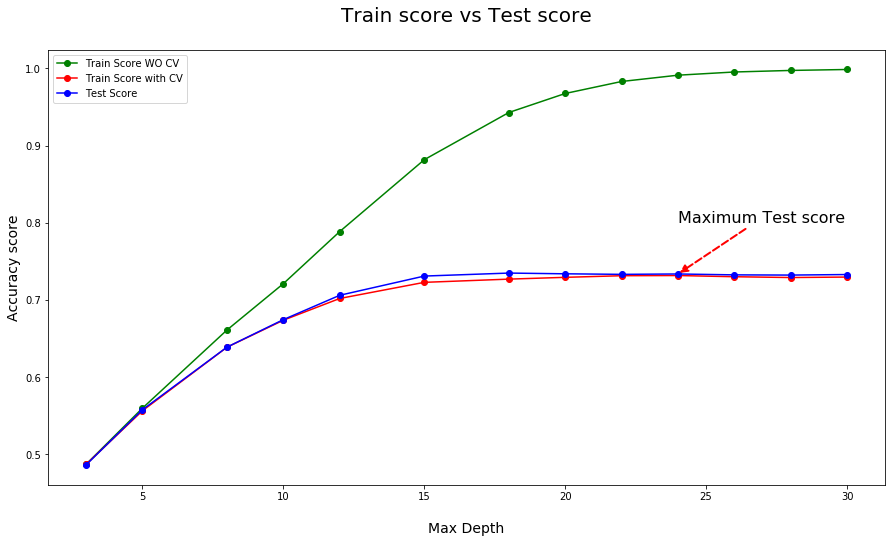

In [88]:
plt.figure(figsize=(15,8))
x_axis = [3,5,8,10,12,15,18,20,22,24,26,28,30]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score WO CV',marker='o')
plt.plot(x_axis, train_cv_array, c = 'r', label = 'Train Score with CV',marker='o')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score',marker='o')
plt.legend()
plt.title('Train score vs Test score\n',fontsize=20)
plt.xlabel('\nMax Depth',fontsize=14)
plt.ylabel('Accuracy score',fontsize=14)
#plt.xticks(np.arange(0, 100,3))
plt.annotate("Maximum Test score",fontsize=16,xy=(24, 0.73366),xytext=(24, 0.80), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.show()

### 7). Random Forest Classifier

In [90]:
train_cv_array=[]
train_score_array = []
test_score_array = []

from sklearn.ensemble import RandomForestClassifier
for n in [100,200,300]:
    for d in [20,25,28,35,50]:
        rftree = RandomForestClassifier(n_jobs=-1,random_state=42,criterion='gini',n_estimators=n,max_depth=d)
        scores = cross_val_score(rftree, x_train_pca, y_train, cv=5)
        print('\nFor n_estimator = ',n,' and For maxdepth =',d)
        print('\nCross validation Testing mean:',scores.mean())
        rftree.fit(x_train_pca,y_train)
        y_pred=rftree.predict(x_test_pca)
        train_score_array.append(rftree.score(x_train_pca, y_train))
        test_score_array.append(rftree.score(x_test_pca, y_test))
        train_cv_array.append(scores.mean())
        print('Training score without CV:',rftree.score(x_train_pca, y_train))
        print('Test score -->',rftree.score(x_test_pca, y_test))
        print('\nThe Confusion Matrix is plotted below:')
        display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
        print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
        print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
              f1_score(y_test, y_pred, average='micro').round(2) )
        print('--------------------------------------------------------------------------')
    


For n_estimator =  100  and For maxdepth = 20

Cross validation Testing mean: 0.8020249907660115
Training score without CV: 0.9933858043715329
Test score --> 0.811162121798772

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2364,482,5,0,88,12,185
2,555,1673,62,0,226,76,24
3,0,17,2767,108,43,469,0
4,0,0,139,524,0,56,0
5,33,113,44,0,2121,39,0
6,2,24,394,41,30,2529,0
7,132,14,1,0,0,0,2687



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.75      0.76      3136
          2       0.72      0.64      0.68      2616
          3       0.81      0.81      0.81      3404
          4       0.78      0.73      0.75       719
          5       0.85      0.90      0.87      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.81      0.81      0.81     18079

   micro avg	   0.81      0.81      0.81
--------------------------------------------------------------------------

For n_estimator =  100  and For maxdepth = 25

Cross validation Testing mean: 0.8058649574571939
Training score without CV: 0.9996918116732255
Test score --> 0.817246529122186

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2396,480,4,0,69,11,176
2,539,1702,61,0,214,75,25
3,0,19,2794,109,29,453,0
4,0,0,125,531,0,63,0
5,34,117,40,0,2117,42,0
6,1,27,393,43,22,2534,0
7,118,14,0,0,1,0,2701



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.78      0.76      0.77      3136
          2       0.72      0.65      0.68      2616
          3       0.82      0.82      0.82      3404
          4       0.78      0.74      0.76       719
          5       0.86      0.90      0.88      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.82      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  100  and For maxdepth = 28

Cross validation Testing mean: 0.8064817174400225
Training score without CV: 0.9999762932056327
Test score --> 0.8160296476575032

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2394,474,4,0,75,10,179
2,563,1695,61,0,193,79,25
3,0,18,2784,110,26,466,0
4,0,0,142,525,0,52,0
5,32,111,44,0,2120,43,0
6,1,25,393,37,21,2543,0
7,126,15,1,0,0,0,2692



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.77      3136
          2       0.72      0.65      0.68      2616
          3       0.81      0.82      0.81      3404
          4       0.78      0.73      0.75       719
          5       0.87      0.90      0.89      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.81      0.82      0.81     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  100  and For maxdepth = 35

Cross validation Testing mean: 0.8066002036683211
Training score without CV: 0.9999762932056327
Test score --> 0.8166934011836938

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2388,477,5,0,72,13,181
2,543,1710,62,0,198,75,28
3,0,17,2802,109,29,447,0
4,0,0,142,526,0,51,0
5,35,109,43,0,2121,42,0
6,2,28,403,41,22,2524,0
7,127,12,1,0,0,0,2694



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.77      3136
          2       0.73      0.65      0.69      2616
          3       0.81      0.82      0.82      3404
          4       0.78      0.73      0.75       719
          5       0.87      0.90      0.89      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.81      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  100  and For maxdepth = 50

Cross validation Testing mean: 0.8064579532757137
Training score without CV: 0.9999762932056327
Test score --> 0.8159190220698047

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2388,479,5,0,71,13,180
2,545,1710,63,0,200,72,26
3,0,17,2796,110,29,452,0
4,0,0,143,518,0,58,0
5,38,114,44,0,2114,40,0
6,2,26,400,41,22,2529,0
7,125,12,1,0,0,0,2696



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.77      3136
          2       0.73      0.65      0.69      2616
          3       0.81      0.82      0.82      3404
          4       0.77      0.72      0.75       719
          5       0.87      0.90      0.88      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.81      0.82      0.81     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 20

Cross validation Testing mean: 0.8038267617917875
Training score without CV: 0.9941918353800199
Test score --> 0.8128768184080978

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2375,486,5,0,80,14,176
2,548,1683,61,0,222,76,26
3,0,15,2765,109,37,478,0
4,0,0,131,532,0,56,0
5,31,118,42,0,2122,37,0
6,2,23,391,42,30,2532,0
7,133,13,1,0,0,0,2687



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.76      3136
          2       0.72      0.64      0.68      2616
          3       0.81      0.81      0.81      3404
          4       0.78      0.74      0.76       719
          5       0.85      0.90      0.88      2350
          6       0.79      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.81      0.81      0.81     18079

   micro avg	   0.81      0.81      0.81
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 25

Cross validation Testing mean: 0.8079748331149249
Training score without CV: 0.9998103456450619
Test score --> 0.8184080977930195

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2400,471,5,0,68,14,178
2,544,1707,62,0,204,75,24
3,0,14,2804,108,25,453,0
4,0,0,129,532,0,58,0
5,33,110,44,0,2122,41,0
6,1,27,396,43,23,2530,0
7,118,14,0,0,1,0,2701



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.78      0.77      0.77      3136
          2       0.73      0.65      0.69      2616
          3       0.82      0.82      0.82      3404
          4       0.78      0.74      0.76       719
          5       0.87      0.90      0.89      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.82      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 28

Cross validation Testing mean: 0.8076196189154773
Training score without CV: 1.0
Test score --> 0.8181868466176226

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2393,478,5,0,75,12,173
2,549,1706,59,0,199,77,26
3,0,16,2797,109,25,457,0
4,0,0,132,532,0,55,0
5,32,110,48,0,2116,44,0
6,2,24,385,40,19,2550,0
7,123,12,0,0,1,0,2698



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.77      3136
          2       0.73      0.65      0.69      2616
          3       0.82      0.82      0.82      3404
          4       0.78      0.74      0.76       719
          5       0.87      0.90      0.88      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.82      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 35

Cross validation Testing mean: 0.8073588627305108
Training score without CV: 1.0
Test score --> 0.8175784058852813

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2385,487,5,0,67,14,178
2,535,1722,59,0,200,74,26
3,0,15,2797,105,28,459,0
4,0,0,136,526,0,57,0
5,31,111,44,0,2122,42,0
6,2,28,395,40,23,2532,0
7,124,12,1,0,0,0,2697



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.78      0.76      0.77      3136
          2       0.73      0.66      0.69      2616
          3       0.81      0.82      0.82      3404
          4       0.78      0.73      0.76       719
          5       0.87      0.90      0.89      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.82      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  200  and For maxdepth = 50

Cross validation Testing mean: 0.8074061521336487
Training score without CV: 1.0
Test score --> 0.8169146523590907

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2383,489,5,0,66,15,178
2,542,1715,61,0,199,73,26
3,0,15,2803,106,29,451,0
4,0,0,139,524,0,56,0
5,31,117,43,0,2115,44,0
6,2,28,400,40,22,2528,0
7,119,13,0,0,1,0,2701



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.77      3136
          2       0.72      0.66      0.69      2616
          3       0.81      0.82      0.82      3404
          4       0.78      0.73      0.75       719
          5       0.87      0.90      0.88      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.81      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 20

Cross validation Testing mean: 0.8047749971856349
Training score without CV: 0.9945237305011616
Test score --> 0.8144255766358759

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2378,488,5,0,79,11,175
2,542,1696,61,0,217,76,24
3,0,15,2783,110,37,459,0
4,0,0,139,523,0,57,0
5,31,115,46,0,2122,36,0
6,3,21,389,42,30,2535,0
7,133,13,1,0,0,0,2687



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.76      3136
          2       0.72      0.65      0.68      2616
          3       0.81      0.82      0.82      3404
          4       0.77      0.73      0.75       719
          5       0.85      0.90      0.88      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.81      0.81      0.81     18079

   micro avg	   0.81      0.81      0.81
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 25

Cross validation Testing mean: 0.8076193238760615
Training score without CV: 0.9998103456450619
Test score --> 0.8185740361745671

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2389,479,5,0,72,14,177
2,547,1707,57,0,206,74,25
3,0,16,2811,104,26,447,0
4,0,0,133,528,0,58,0
5,33,105,45,0,2126,41,0
6,2,27,389,43,22,2537,0
7,119,13,0,0,1,0,2701



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.77      3136
          2       0.73      0.65      0.69      2616
          3       0.82      0.83      0.82      3404
          4       0.78      0.73      0.76       719
          5       0.87      0.90      0.89      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.82      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 28

Cross validation Testing mean: 0.8084494074069483
Training score without CV: 1.0
Test score --> 0.8176890314729797

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2384,484,5,0,76,14,173
2,546,1708,59,0,201,77,25
3,0,16,2794,108,29,457,0
4,0,0,132,533,0,54,0
5,27,113,47,0,2121,42,0
6,1,28,383,37,24,2547,0
7,123,14,0,0,1,0,2696



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.77      3136
          2       0.72      0.65      0.69      2616
          3       0.82      0.82      0.82      3404
          4       0.79      0.74      0.76       719
          5       0.87      0.90      0.88      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.82      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 35

Cross validation Testing mean: 0.8079751843502165
Training score without CV: 1.0
Test score --> 0.8165827755959953

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2370,489,5,0,76,13,183
2,538,1717,59,0,200,77,25
3,0,15,2797,109,26,457,0
4,0,0,138,526,0,55,0
5,30,115,46,0,2116,43,0
6,3,29,387,40,23,2538,0
7,125,9,0,0,1,0,2699



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.76      3136
          2       0.72      0.66      0.69      2616
          3       0.81      0.82      0.82      3404
          4       0.78      0.73      0.75       719
          5       0.87      0.90      0.88      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.81      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------

For n_estimator =  300  and For maxdepth = 50

Cross validation Testing mean: 0.808188401058543
Training score without CV: 1.0
Test score --> 0.8169146523590907

The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2380,485,5,0,73,14,179
2,544,1712,62,0,198,75,25
3,0,14,2798,108,28,456,0
4,0,0,138,527,0,54,0
5,30,114,45,0,2120,41,0
6,3,28,386,41,23,2539,0
7,128,12,0,0,1,0,2693



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.77      0.76      0.77      3136
          2       0.72      0.65      0.69      2616
          3       0.81      0.82      0.82      3404
          4       0.78      0.73      0.76       719
          5       0.87      0.90      0.88      2350
          6       0.80      0.84      0.82      3020
          7       0.93      0.95      0.94      2834

avg / total       0.81      0.82      0.82     18079

   micro avg	   0.82      0.82      0.82
--------------------------------------------------------------------------


From above we can see that when n_estimator=300 and max_depth = 25 we get a maximum accuracy score of 0.8185

<div class="alert alert-block alert-info">
<b><font size="4"> SCORES COMPARISON</font></b>
</div>


In [91]:
wo_pca_dict={'normal':[0.86382,0.68765,0.65474,0.70004,0.87958,0.84795,0.9063],
             'with_pca':[0.79213,0.60767,0.53786,0.6075,0.79678,0.73366,0.81857]}

In [100]:
scores_comparison=pd.DataFrame(wo_pca_dict,index=['KNeighborsClassifier','LogisticRegression','LinearSVC','SVC-Linear Kernal','SVC-Radial Bias Kernal','Decision Trees','Random Forest'])
scores_comparison.rename(columns={'normal':'Accuracy without PCA','with_pca':'Accuracy with PCA'},inplace=True)
print('\n\nThe accuracy score comparison of all the models with and without Principal Component Analysis is tabulated below:\n')
display(scores_comparison)
print('\n From the above results we can see that the PCA do reduces the accuracy score but the time consumption for creating those\n models is lesser than the other models which takes all the variables in it for modelling\n\n')



The accuracy score comparison of all the models with and without Principal Component Analysis is tabulated below:



,Accuracy without PCA,Accuracy with PCA
KNeighborsClassifier,0.86382,0.79213
LogisticRegression,0.68765,0.60767
LinearSVC,0.65474,0.53786
SVC-Linear Kernal,0.70004,0.60750
SVC-Radial Bias Kernal,0.87958,0.79678
Decision Trees,0.84795,0.73366
Random Forest,0.90630,0.81857



 From the above results we can see that the PCA do reduces the accuracy score but the time consumption for creating those
 models is lesser than the other models which takes all the variables in it for modelling




<div class="alert alert-block alert-info">
<b><font size="4"> DEEP NEURAL NETWORK</font></b>
</div>


In [102]:
# Import `Sequential` from `keras.models`
import keras
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

Using TensorFlow backend.


In [104]:
x_train_sc.shape

(42182, 52)

In [120]:
# Import `Sequential` from `keras.models`
import keras
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
ann_model = Sequential()

# Add one input layer and first hidden layer
ann_model.add(Dense(30, activation='relu', input_dim=52))

# Add second hidden layer 
ann_model.add(Dense(10, activation='relu'))

# Add third hidden layer
ann_model.add(Dense(5, activation='relu'))

# Add an output layer 
ann_model.add(Dense(7, activation='softmax')) #as this model has 7 multi class we have to use softmax

#### The optimizer and the loss are two arguments that are required if you want to compile the model.
#### Some of the most popular optimization algorithms used are the Stochastic Gradient Descent (SGD), ADAM and RMSprop
 The choice for a loss function depends on the task that you have at hand:   
 •for example, for a regression problem, you’ll usually use the Mean Squared Error (MSE).   
 •wil be using binary_crossentropy for the binary classification problem     
 •Lastly, with multi-class classification, you’ll make use of categorical_crossentropy.  
 
 
 for more info refer the below link:   
 https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [121]:
ann_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [108]:
# one-hot encoding using keras' numpy-related utilities
import pandas as pd

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (42182,)
Shape after one-hot encoding:  (42182, 7)


In [124]:
ann_result=ann_model.fit(x_train_sc, Y_train,epochs=100, batch_size=20, verbose=1)

Epoch 1/100
42182/42182 [==============================] - 6s 134us/step - loss: 0.5178 - accuracy: 0.7867
Epoch 2/100
42182/42182 [==============================] - 5s 128us/step - loss: 0.5159 - accuracy: 0.7884
Epoch 3/100
42182/42182 [==============================] - 6s 144us/step - loss: 0.5169 - accuracy: 0.7889
Epoch 4/100
42182/42182 [==============================] - 8s 183us/step - loss: 0.5157 - accuracy: 0.7888
Epoch 5/100
42182/42182 [==============================] - 7s 157us/step - loss: 0.5142 - accuracy: 0.7885
Epoch 6/100
42182/42182 [==============================] - 11s 269us/step - loss: 0.5132 - accuracy: 0.7888
Epoch 7/100
42182/42182 [==============================] - 14s 339us/step - loss: 0.5141 - accuracy: 0.7893
Epoch 8/100
42182/42182 [==============================] - 10s 246us/step - loss: 0.5131 - accuracy: 0.7901
Epoch 9/100
42182/42182 [==============================] - 11s 257us/step - loss: 0.5118 - accuracy: 0.7913
Epoch 10/100
42182/42182 [=======

An epoch is a single pass through the entire training set, followed by testing of the verification set. The batch size that you specify in the code above defines the number of samples that going to be propagated through the network. Also, by doing this, you optimize the efficiency because you make sure that you don’t load too many input patterns into memory at the same time.

In [135]:
score = ann_model.evaluate(x_test_sc, Y_test,verbose=1) 
score
#The score is a list that holds the combination of the loss and the accuracy.


18079/18079 [==============================] - 1s 49us/step


[0.5143300769992275, 0.7951767444610596]

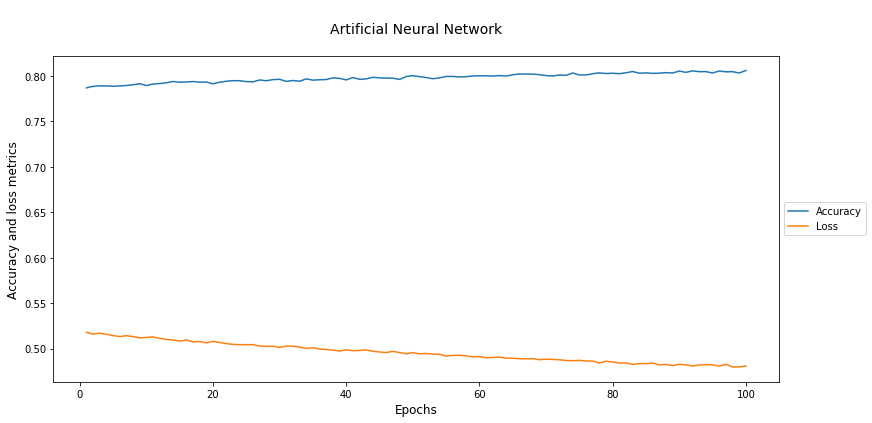

In [128]:
plt.figure(figsize=(13,6))
x= range(1,101)
plt.plot(x, ann_result.history['accuracy'], label='Accuracy')
plt.plot(x, ann_result.history['loss'], label='Loss')
plt.title('\nArtificial Neural Network\n',fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy and loss metrics',fontsize=12)
plt.show()

In [129]:
y_pred=ann_model.predict_classes(x_test_sc)

In [138]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [139]:
y_pred=y_pred+1

In [140]:
np.unique(y_pred)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [141]:
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7]),index=[1,2,3,4,5,6,7],columns=[1,2,3,4,5,6,7]))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
print('--------------------------------------------------------------------------')



The Confusion Matrix is plotted below:


,1,2,3,4,5,6,7
1,2227,632,5,0,85,22,165
2,526,1605,64,0,274,134,13
3,0,11,2526,81,7,779,0
4,0,0,99,556,0,64,0
5,3,69,90,0,2104,84,0
6,0,4,219,28,15,2754,0
7,218,1,9,0,2,0,2604



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          1       0.75      0.71      0.73      3136
          2       0.69      0.61      0.65      2616
          3       0.84      0.74      0.79      3404
          4       0.84      0.77      0.80       719
          5       0.85      0.90      0.87      2350
          6       0.72      0.91      0.80      3020
          7       0.94      0.92      0.93      2834

avg / total       0.80      0.80      0.79     18079

   micro avg	   0.8      0.8      0.8
--------------------------------------------------------------------------


In [142]:
ann_model.get_weights()

[array([[-2.2458344 , -0.20367867, -0.21033125, ...,  2.3009655 ,
         -1.2025775 ,  2.9679933 ],
        [ 0.08803836, -0.01859238, -0.0244036 , ..., -0.5680583 ,
          0.24279661, -0.2025488 ],
        [ 0.42563123, -0.10243618, -0.26285735, ..., -0.2375219 ,
          0.09755377, -0.02183666],
        ...,
        [-0.7996953 ,  0.2192311 ,  0.1968117 , ..., -0.4493628 ,
          1.3219329 ,  0.39180934],
        [-0.2524451 , -0.08465193, -0.11277755, ..., -0.15464106,
         -0.02008776, -0.16133134],
        [-1.2106701 , -0.03130643,  0.15980983, ...,  0.5415216 ,
         -0.74738   ,  0.19988102]], dtype=float32),
 array([ 0.8895972 , -0.01238416, -0.04433133, -0.07228468, -0.09348878,
         0.07616729,  0.7589602 , -0.3262407 ,  0.49058583, -0.5360966 ,
        -0.1081247 ,  0.36451823,  0.56667167,  0.09893838,  0.7321355 ,
        -0.53108543,  0.09608506, -0.6571693 ,  0.5579387 ,  0.24596632,
         0.09895695, -0.5578914 , -0.34853563, -0.78787297,  0.217

In [143]:
ann_model.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_11',
    'trainable': True,
    'batch_input_shape': (None, 52),
    'dtype': 'float32',
    'units': 30,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_12',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer':

In [144]:
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30)                1590      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 42        
Total params: 1,997
Trainable params: 1,997
Non-trainable params: 0
_________________________________________________________________
